In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import geopandas as gpd
import datetime
from PIL import Image

In [2]:
import streamlit as st
# Patch Streamlit pour fonctionner dans un environnement Jupyter lignes de code conservée in case changement d'éditeur de code
#StreamlitPatcher().jupyter()
#from streamlit_jupyter import StreamlitPatcher, tqdm

# I - OUVERTURE DU FICHIER DE DONNEES,  MISE EN DATAFRAME df  et PRISE DE CONNAISSANCE

In [3]:
#lecture du fichier  fr-esr-insersup
csv_file = "fr-esr-insersup.csv"
df = pd.read_csv(csv_file,sep=';')

In [4]:
#analyse du fichier insertion_professionnelle_master_donnees
print(df.shape)

(45870, 31)


In [5]:
df.describe()

,Mois après la diplomation
count,45870.000000
mean,17.376978
std,8.246734
min,6.000000
25%,12.000000
50%,18.000000
75%,24.000000
max,30.000000


In [6]:
df.columns

Index(['Diffusion des données', 'Région', 'Académie', 'Établissement',
       'Établissement actuel', 'Type de diplôme', 'Domaine disciplinaire',
       'Discipline', 'Secteur disciplinaire', 'Libellé du diplôme',
       'Source de données', 'Nombre de poursuivants', 'Nombre de sortants',
       'Année(s) d'obtention du diplôme prise(s) en compte',
       'Date d'insertion en emploi', 'Flag', 'Exception',
       'Taux d'emploi salarié en France', 'Taux d'insertion', 'Taux d'emploi',
       'Code de la région', 'Code de l'académie',
       'Identifiant interne de l'établissement',
       'Identifiant interne de l'établissement actuel',
       'Code UAI de l'établissement', 'type_diplome',
       'Code du domaine disciplinaire', 'Code de la discipline',
       'Code du secteur disciplinaire', 'Code du diplôme SISE',
       'Mois après la diplomation'],
      dtype='object')

## II - RECHERCHE CARACTERISTIQUES : colonnes, lignes et cellules  / ASSORTIES DU NETTOYAGE 

In [7]:
# Identification des types colonnes non nulles et de leur type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45870 entries, 0 to 45869
Data columns (total 31 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   Diffusion des données                               45870 non-null  object
 1   Région                                              45840 non-null  object
 2   Académie                                            45840 non-null  object
 3   Établissement                                       45870 non-null  object
 4   Établissement actuel                                45870 non-null  object
 5   Type de diplôme                                     45870 non-null  object
 6   Domaine disciplinaire                               45870 non-null  object
 7   Discipline                                          45870 non-null  object
 8   Secteur disciplinaire                               45870 non-null  object
 9   Libell

In [8]:
#Convertir les colonnes objets en numérique, en remplaçant les valeurs non numériques par NaN
# Liste des colonnes à convertir en numeric
cols_to_convert = [
    "Nombre de poursuivants",
    "Nombre de sortants",
    "Taux d'emploi",
    "Taux d'emploi salarié en France",
    "Taux d'insertion",
    "Mois après la diplomation",
    "Code de la discipline"
]

# Conversion des colonnes en numérique, en remplaçant les valeurs non numériques par NaN
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Afficher le DataFrame résultant
print(df)
print(df.info())

      Diffusion des données                      Région Académie  \
0                   2023_S2                         NaN      NaN   
1                   2023_S2                         NaN      NaN   
2                   2023_S2                         NaN      NaN   
3                   2023_S2                         NaN      NaN   
4                   2023_S2                         NaN      NaN   
...                     ...                         ...      ...   
45865               2023_S2  Provence-Alpes-Côte d'Azur     Nice   
45866               2023_S2  Provence-Alpes-Côte d'Azur     Nice   
45867               2023_S2  Provence-Alpes-Côte d'Azur     Nice   
45868               2023_S2  Provence-Alpes-Côte d'Azur     Nice   
45869               2023_S2  Provence-Alpes-Côte d'Azur     Nice   

                Établissement    Établissement actuel  \
0                    National                National   
1                    National                National   
2           

In [9]:
# Sélectionner les colonnes de type float
colonnes_float = df.select_dtypes(include=['float64']).columns

# Afficher les noms de ces colonnes
print("Colonnes de type float :")
print(colonnes_float)

Colonnes de type float :
Index(['Nombre de poursuivants', 'Nombre de sortants',
       'Taux d'emploi salarié en France', 'Taux d'insertion', 'Taux d'emploi',
       'Code de la discipline'],
      dtype='object')


In [10]:
# Identifier les colonnes avec une seule valeur unique
cols_to_drop = [col for col in df.columns if df[col].nunique() == 1]

# Afficher les colonnes supprimées et le DataFrame nettoyé
print(f"Colonnes à supprimer : {cols_to_drop}")
# Supprimer les colonnes avec une seule valeur unique


Colonnes à supprimer : ['Diffusion des données']


In [11]:
#suppression de la colonne à valeur unique Diffusion des données pour laquelle la seule valeur est 2023 S2
df = df.drop(columns=["Diffusion des données"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45870 entries, 0 to 45869
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Région                                              45840 non-null  object 
 1   Académie                                            45840 non-null  object 
 2   Établissement                                       45870 non-null  object 
 3   Établissement actuel                                45870 non-null  object 
 4   Type de diplôme                                     45870 non-null  object 
 5   Domaine disciplinaire                               45870 non-null  object 
 6   Discipline                                          45870 non-null  object 
 7   Secteur disciplinaire                               45870 non-null  object 
 8   Libellé du diplôme                                  45870 non-null  object 


In [13]:
#Identifier toutes les valeurs nulles ou nan du dataframe
null_mask = df.isna() 

# Filtrer les lignes contenant des valeurs nulles, NaN 
df_with_nulls = df[null_mask.any(axis=1)]

# Afficher les lignes contenant des valeurs nulles, NaN 
print(df_with_nulls)

# chaque ligne du DF est bien concernée

                           Région Académie           Établissement  \
0                             NaN      NaN                National   
1                             NaN      NaN                National   
2                             NaN      NaN                National   
3                             NaN      NaN                National   
4                             NaN      NaN                National   
...                           ...      ...                     ...   
45865  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45866  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45867  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45868  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45869  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   

         Établissement actuel          Type de diplôme  \
0                    National  Licence professionnelle   
1                    National              

In [14]:
df.dtypes

Région                                                 object
Académie                                               object
Établissement                                          object
Établissement actuel                                   object
Type de diplôme                                        object
Domaine disciplinaire                                  object
Discipline                                             object
Secteur disciplinaire                                  object
Libellé du diplôme                                     object
Source de données                                      object
Nombre de poursuivants                                float64
Nombre de sortants                                    float64
Année(s) d'obtention du diplôme prise(s) en compte     object
Date d'insertion en emploi                             object
Flag                                                   object
Exception                                              object
Taux d'e

In [15]:
import pandas as pd

# Liste pour stocker les colonnes qui contiennent 'nd' ou '-'
colonnes_avec_valeurs_speciales = []

# Parcourir les colonnes du DataFrame qui sont de type string
for col in df.select_dtypes(include=['string']).columns:
    if df[col].isin(['nd', '-']).any():
        # Ajouter la colonne à la liste si elle contient 'nd' ou '-'
        colonnes_avec_valeurs_speciales.append(col)

# Afficher les colonnes qui contiennent 'nd' ou '-'
print("Colonnes contenant 'nd' ou '-' :")
print(colonnes_avec_valeurs_speciales)


Colonnes contenant 'nd' ou '-' :
[]


In [16]:
# Identifier toutes les colonnes contenant des cellules avec 'nd' ou '-'
mask_nd_or_dash = df.apply(lambda col: col.map(lambda x: x == "nd" or x == "-"))
cols_with_nd_or_dash = mask_nd_or_dash.any(axis=0)

# Afficher les colonnes qui ont au moins une valeur 'nd' ou '-'
print("\nColonnes avec au moins une valeur 'nd' ou '-':")
print(cols_with_nd_or_dash[cols_with_nd_or_dash].index.tolist())
#résultat montre que les nd étaient bien dans les colonnes converties en float. A vérifier ci-dessous


Colonnes avec au moins une valeur 'nd' ou '-':
[]


In [17]:
# Identifier toutes les valeurs 'nd' du dataframe
nd_mask = df.apply(lambda col: col.map(lambda x: x == 'nd'))

# Filtrer les lignes contenant des valeurs 'nd'
df_with_nd = df[nd_mask.any(axis=1)]

# Identifier les colonnes qui ont au moins une valeur 'nd'
cols_with_nd = nd_mask.any(axis=0)

# Afficher les lignes contenant des valeurs 'nd'
print("Lignes avec des valeurs 'nd':")
print(df_with_nd)

# Afficher les colonnes qui ont au moins une valeur 'nd'
print("\nColonnes avec au moins une valeur 'nd':")
print(cols_with_nd[cols_with_nd].index.tolist())

Lignes avec des valeurs 'nd':
Empty DataFrame
Columns: [Région, Académie, Établissement, Établissement actuel, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Source de données, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Date d'insertion en emploi, Flag, Exception, Taux d'emploi salarié en France, Taux d'insertion, Taux d'emploi, Code de la région, Code de l'académie, Identifiant interne de l'établissement, Identifiant interne de l'établissement actuel, Code UAI de l'établissement, type_diplome, Code du domaine disciplinaire, Code de la discipline, Code du secteur disciplinaire, Code du diplôme SISE, Mois après la diplomation]
Index: []

[0 rows x 30 columns]

Colonnes avec au moins une valeur 'nd':
[]


In [18]:
#Identifier toutes les valeurs - du dataframe signifiant que la donnée n'est pas disponible

tiret_mask = df.apply(lambda col: col.map(lambda x: x == '-'))


# Filtrer les lignes contenant des valeurs '-'
df_with_tiret = df[tiret_mask.any(axis=1)]

# Identifier les colonnes qui ont au moins une valeur 'nd'
cols_with_tiret = tiret_mask.any()

# Afficher les lignes contenant des valeurs nulles, NaN ou 'nd'
print("Lignes avec des tirets :")
print(df_with_tiret)

# Afficher les colonnes qui ont au moins une valeur 'nd'
print("\nColonnes avec au moins une valeur 'tiret':")
print(cols_with_tiret[cols_with_tiret].index.tolist())

Lignes avec des tirets :
Empty DataFrame
Columns: [Région, Académie, Établissement, Établissement actuel, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Source de données, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Date d'insertion en emploi, Flag, Exception, Taux d'emploi salarié en France, Taux d'insertion, Taux d'emploi, Code de la région, Code de l'académie, Identifiant interne de l'établissement, Identifiant interne de l'établissement actuel, Code UAI de l'établissement, type_diplome, Code du domaine disciplinaire, Code de la discipline, Code du secteur disciplinaire, Code du diplôme SISE, Mois après la diplomation]
Index: []

[0 rows x 30 columns]

Colonnes avec au moins une valeur 'tiret':
[]


In [19]:
# Supprimer les lignes où "Taux d'emploi salarié en France", "Taux d'emploi" et "Taux d'insertion" sont toutes NaN
df = df.dropna(subset=["Taux d'emploi salarié en France", "Taux d'emploi", "Taux d'insertion"], how='all')

# Afficher le DataFrame résultant
print(df)

                           Région Académie           Établissement  \
0                             NaN      NaN                National   
1                             NaN      NaN                National   
2                             NaN      NaN                National   
3                             NaN      NaN                National   
4                             NaN      NaN                National   
...                           ...      ...                     ...   
45852  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45853  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45855  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45856  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45861  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   

         Établissement actuel          Type de diplôme  \
0                    National  Licence professionnelle   
1                    National              

In [20]:
#identifier toutes les lignes de la colonne Année(s) d'obtention du diplôme prise(s) en compte qui sont nulles 

df_no_millesime = df[df["Année(s) d'obtention du diplôme prise(s) en compte"].isna()]

# Afficher le DataFrame résultant
print(df_no_millesime)

Empty DataFrame
Columns: [Région, Académie, Établissement, Établissement actuel, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Source de données, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Date d'insertion en emploi, Flag, Exception, Taux d'emploi salarié en France, Taux d'insertion, Taux d'emploi, Code de la région, Code de l'académie, Identifiant interne de l'établissement, Identifiant interne de l'établissement actuel, Code UAI de l'établissement, type_diplome, Code du domaine disciplinaire, Code de la discipline, Code du secteur disciplinaire, Code du diplôme SISE, Mois après la diplomation]
Index: []

[0 rows x 30 columns]


In [21]:
df.describe

<bound method NDFrame.describe of                            Région Académie           Établissement  \
0                             NaN      NaN                National   
1                             NaN      NaN                National   
2                             NaN      NaN                National   
3                             NaN      NaN                National   
4                             NaN      NaN                National   
...                           ...      ...                     ...   
45852  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45853  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45855  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45856  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45861  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   

         Établissement actuel          Type de diplôme  \
0                    National  Licence professionnelle   
1        

In [22]:
df["Mois après la diplomation"].value_counts()

Mois après la diplomation
18    7516
6     5728
12    5728
30    4597
24    2782
Name: count, dtype: int64

In [23]:
df["Taux d'emploi salarié en France"].value_counts()

Taux d'emploi salarié en France
75.00    493
80.00    419
66.70    378
50.00    343
85.70    291
        ... 
93.45      1
85.12      1
78.32      1
83.97      1
70.67      1
Name: count, Length: 1682, dtype: int64

In [24]:
df["Taux d'emploi"].value_counts()

Taux d'emploi
100.00    374
90.00      14
85.71      12
90.91       9
95.87       9
         ... 
98.65       1
98.48       1
72.30       1
85.83       1
84.56       1
Name: count, Length: 1734, dtype: int64

In [25]:
df["Taux d'insertion"].value_counts()

Taux d'insertion
100.00    739
95.24      16
90.91      14
90.00      13
95.01      10
         ... 
81.50       1
64.80       1
90.95       1
98.42       1
84.56       1
Name: count, Length: 1458, dtype: int64

In [26]:
df["Année(s) d'obtention du diplôme prise(s) en compte"].value_counts()

Année(s) d'obtention du diplôme prise(s) en compte
2020         9113
2019,2020    8400
2021         4824
2020,2021    4014
Name: count, dtype: int64

In [27]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Région,NaN,NaN,NaN,NaN,NaN,Mayotte,La Réunion,La Réunion,La Réunion,La Réunion
Académie,NaN,NaN,NaN,NaN,NaN,Mayotte,La Réunion,La Réunion,La Réunion,La Réunion
Établissement,National,National,National,National,National,Université de Mayotte,Université de La Réunion,Université de La Réunion,Université de La Réunion,Université de La Réunion
Établissement actuel,National,National,National,National,National,Université de Mayotte,Université de La Réunion,Université de La Réunion,Université de La Réunion,Université de La Réunion
Type de diplôme,Licence professionnelle,Master LMD,Master MEEF,Master LMD,Master MEEF,Licence professionnelle,Master LMD,Master MEEF,Master MEEF,Master MEEF
Domaine disciplinaire,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,"Droit, économie, gestion",Tous domaines disciplinaires,Tous domaines disciplinaires,Sciences humaines et sociales,Sciences humaines et sociales
Discipline,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,Toutes disciplines,"Sciences économiques, gestion",Toutes disciplines,Toutes disciplines,Sciences humaines et sociales,Sciences humaines et sociales
Secteur disciplinaire,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Sciences de gestion,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Sciences de l'éducation,Sciences de l'éducation
Libellé du diplôme,Toute licence professionnelle,Tout Master LMD,Tout Master MEEF,Tout Master LMD,Tout Master MEEF,MANAGEMENT ET GESTION DES ORGANISATIONS,Tout Master LMD,Tout Master MEEF,"METIERS DE L'ENSEIGNEMENT, DE L'EDUCATION ET D...","METIERS DE L'ENSEIGNEMENT, DE L'EDUCATION ET D..."
Source de données,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup


In [28]:
#identification et gestion des colonnes dupliquées

# Transposer le DataFrame pour travailler avec les colonnes comme des lignes
df_T = df.T

# Identifier les colonnes dupliquées
duplicate_columns = df_T.duplicated()

# Afficher les colonnes dupliquées
print("Colonnes dupliquées :")
print(duplicate_columns)

# Compter le nombre de colonnes dupliquées
num_duplicates = duplicate_columns.sum()
print(f"Nombre de colonnes dupliquées : {num_duplicates}")

#pas de colonne à supprimer

Colonnes dupliquées :
Région                                                False
Académie                                              False
Établissement                                         False
Établissement actuel                                  False
Type de diplôme                                       False
Domaine disciplinaire                                 False
Discipline                                            False
Secteur disciplinaire                                 False
Libellé du diplôme                                    False
Source de données                                     False
Nombre de poursuivants                                False
Nombre de sortants                                    False
Année(s) d'obtention du diplôme prise(s) en compte    False
Date d'insertion en emploi                            False
Flag                                                  False
Exception                                             False
Taux d'emploi sala

In [29]:
##gestion des colonnes redondantes et quasi dupliquées sur la base du head(ci-dessus)

# Comparaison des deux colonnes
compared = df["Identifiant interne de l'établissement"] != df["Identifiant interne de l'établissement actuel"]

# Créer un DataFrame des résultats de la comparaison
compared_df = pd.DataFrame(compared, columns=['Différences'])

# Ajouter les colonnes d'origine au DataFrame des différences pour contexte
compared_df["Identifiant interne de l'établissement"] = df["Identifiant interne de l'établissement"]
compared_df["Identifiant interne de l'établissement actuel"] = df["Identifiant interne de l'établissement actuel"]

# Filtrer les lignes où il y a des différences (True)
differences_df = compared_df[compared_df['Différences']]

# Transposer le résultat pour voir tous les True renvoyés
transposed_differences = differences_df.T

# Afficher les différences transposées
print(transposed_differences)



                                               1416   1418   1422   1423   \
Différences                                     True   True   True   True   
Identifiant interne de l'établissement         GBpkg  GBpkg  GBpkg  GBpkg   
Identifiant interne de l'établissement actuel  TWBzp  TWBzp  TWBzp  TWBzp   

                                               1424   1425   1427   1436   \
Différences                                     True   True   True   True   
Identifiant interne de l'établissement         GBpkg  GBpkg  GBpkg  GBpkg   
Identifiant interne de l'établissement actuel  TWBzp  TWBzp  TWBzp  TWBzp   

                                               1442   1449   ...  45488  \
Différences                                     True   True  ...   True   
Identifiant interne de l'établissement         GBpkg  GBpkg  ...  GBpkg   
Identifiant interne de l'établissement actuel  TWBzp  TWBzp  ...  TWBzp   

                                               45494  45495  45496  45497  \
Diff

In [30]:
df.tail()

,Région,Académie,Établissement,Établissement actuel,Type de diplôme,Domaine disciplinaire,Discipline,Secteur disciplinaire,Libellé du diplôme,Source de données,...,Code de l'académie,Identifiant interne de l'établissement,Identifiant interne de l'établissement actuel,Code UAI de l'établissement,type_diplome,Code du domaine disciplinaire,Code de la discipline,Code du secteur disciplinaire,Code du diplôme SISE,Mois après la diplomation
45852,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,GESTION DES RESSOURCES HUMAINES,insersup,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,2.0,39,2500034,24
45853,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,"MARKETING, VENTE",insersup,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,2.0,39,2500023,18
45855,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,COMPTABILITE-CONTROLE-AUDIT,insersup,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,2.0,39,2500020,12
45856,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Master LMD,"Droit, économie, gestion","Sciences économiques, gestion",Sciences de gestion,COMPTABILITE-CONTROLE-AUDIT,insersup,...,A23,s3t8T,s3t8T,0062205P,master_LMD,DEG,2.0,39,2500020,24
45861,Provence-Alpes-Côte d'Azur,Nice,Université Côte d'Azur,Université Côte d'Azur,Licence professionnelle,"Droit, économie, gestion","Sciences économiques, gestion",Sciences économiques,METIERS DU TOURISME ET DES LOISIRS,insersup,...,A23,s3t8T,s3t8T,0062205P,licence_pro,DEG,2.0,38,2400155,30


In [31]:
df["Code de la discipline"].value_counts()

Code de la discipline
2.0     6589
15.0    5645
6.0     4854
1.0     2524
9.0     2189
4.0      920
5.0      589
10.0     586
31.0     277
32.0     247
3.0      176
33.0      96
13.0       3
Name: count, dtype: int64

In [32]:
df["Région"].value_counts()

Région
Île-de-France                 4030
Auvergne-Rhône-Alpes          3486
Occitanie                     2787
Nouvelle-Aquitaine            2687
Grand Est                     2575
Hauts-de-France               2250
Bretagne                      1763
Provence-Alpes-Côte d'Azur    1665
Pays de la Loire              1564
Normandie                     1094
Bourgogne-Franche-Comté       1005
Centre-Val de Loire            918
La Réunion                     186
Guadeloupe                     127
Corse                          123
Guyane                          50
Mayotte                         11
Name: count, dtype: int64

In [33]:
df["Académie"].value_counts()

Académie
Lyon                1891
Rennes              1763
Lille               1754
Nantes              1564
Paris               1495
Toulouse            1452
Bordeaux            1448
Versailles          1373
Montpellier         1335
Créteil             1162
Normandie           1094
Aix-Marseille       1086
Nancy-Metz          1040
Strasbourg          1033
Grenoble            1000
Orléans-Tours        918
Poitiers             862
Clermont-Ferrand     595
Nice                 579
Dijon                543
Reims                502
Amiens               496
Besançon             462
Limoges              377
La Réunion           186
Guadeloupe           127
Corse                123
Guyane                50
Mayotte               11
Name: count, dtype: int64

In [34]:
#identification des valeurs manquantes ou nulles 
print(df.isnull().values.any())
print(df.isnull().sum())

True
Région                                                   30
Académie                                                 30
Établissement                                             0
Établissement actuel                                      0
Type de diplôme                                           0
Domaine disciplinaire                                     0
Discipline                                                0
Secteur disciplinaire                                     0
Libellé du diplôme                                        0
Source de données                                         0
Nombre de poursuivants                                 4921
Nombre de sortants                                     3603
Année(s) d'obtention du diplôme prise(s) en compte        0
Date d'insertion en emploi                                0
Flag                                                  13931
Exception                                             13931
Taux d'emploi salarié en France    

In [35]:
# supprimer les lignes quand les 3 colonnes "Taux d'emploi", "Taux d'emploi salarié en France" et "Taux d'insertion" sont vides ou nd

# Remplacer les valeurs 'nd' par NaN pour faciliter le filtrage
df.replace('nd', np.nan, inplace=True)

# Supprimer les lignes où les trois colonnes ont des valeurs NaN simultanément
df = df.dropna(subset=["Taux d'emploi", "Taux d'emploi salarié en France", "Taux d'insertion"], how='all')

# Afficher le dataframe nettoyé
print(df)


                           Région Académie           Établissement  \
0                             NaN      NaN                National   
1                             NaN      NaN                National   
2                             NaN      NaN                National   
3                             NaN      NaN                National   
4                             NaN      NaN                National   
...                           ...      ...                     ...   
45852  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45853  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45855  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45856  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   
45861  Provence-Alpes-Côte d'Azur     Nice  Université Côte d'Azur   

         Établissement actuel          Type de diplôme  \
0                    National  Licence professionnelle   
1                    National              

In [36]:
# Calcul du nombre de valeurs distinctes pour chaque colonne
distinct_counts = df.nunique()

print(distinct_counts)

Région                                                  17
Académie                                                29
Établissement                                           69
Établissement actuel                                    69
Type de diplôme                                          3
Domaine disciplinaire                                    5
Discipline                                              14
Secteur disciplinaire                                   45
Libellé du diplôme                                     405
Source de données                                        2
Nombre de poursuivants                                 142
Nombre de sortants                                     430
Année(s) d'obtention du diplôme prise(s) en compte       4
Date d'insertion en emploi                               5
Flag                                                     1
Exception                                                1
Taux d'emploi salarié en France                       16

# conclusion de l'application de l'appel de nunique  

## colonne à supprimer et indication à remonter dans streamlit pour présentation liminaire de l'appli :   
'Diffusion de données
'Source de données

## arbiter le sort à donner sur les colonnes :
'etablissement et établissement actuel : supprimer la colonne établissement
Identifiant interne de l'établissement et Identifiant interne de l'établissement actuel     suprrimer le code qui va correspond à la colonne supprimée à la ligne du dessus
## étudier les colonnes qui ont le même nombre d'occurrences et de titres "quasi-similaires"
Domaine disciplinaire et code disciplinaire
Secteur disciplinaire et code du secteur disciplinaire 
région et code de la région 
code discipline et  discipline 19



In [37]:
# Filtrer les données par année et type de diplôme
df_filtered = df[(df["Année(s) d'obtention du diplôme prise(s) en compte"] == "2020") & 
                     (df["Type de diplôme"] == "Master MEEF") & (df["Date d'insertion en emploi"] == "12 mois après le diplôme")]

# Groupe 1 : Région est vide
groupe1 = df_filtered[df_filtered["Région"].isna()]

# Groupe 2 : Région n'est pas vide
groupe2 = df_filtered[~df_filtered["Région"].isna()]

# Calcul du nombre de sortants pour chaque groupe
nombre_sortants_groupe1 = groupe1["Nombre de sortants"].sum()
nombre_sortants_groupe2 = groupe2["Nombre de sortants"].sum()

# Comparaison
difference = nombre_sortants_groupe2 - nombre_sortants_groupe1
print(difference)
print(nombre_sortants_groupe2)
print(nombre_sortants_groupe1)



11769.0
23916.0
12147.0


In [38]:
# Filtrer les lignes où toutes les colonnes spécifiées sont NaN
df_filteredbis = df[
    df['Région'].isna() & 
    df['Académie'].isna() & 
    df['Code de la région'].isna() & 
    df["Code de l'académie"].isna()
]

# Afficher le DataFrame transposé après filtrage
print(df_filteredbis.T)


                                                                            0      \
Région                                                                        NaN   
Académie                                                                      NaN   
Établissement                                                            National   
Établissement actuel                                                     National   
Type de diplôme                                           Licence professionnelle   
Domaine disciplinaire                                Tous domaines disciplinaires   
Discipline                                                     Toutes disciplines   
Secteur disciplinaire                                Tous secteurs disciplinaires   
Libellé du diplôme                                  Toute licence professionnelle   
Source de données                                                        insersup   
Nombre de poursuivants                                           

In [39]:

# Remplacer les valeurs nulles dans la colonne 'Région' par 'National'
df['Région'].fillna('National', inplace=True)

# Remplacer les valeurs nulles dans la colonne 'Académie' par 'National'
df['Académie'].fillna('National', inplace=True)

# Création du dataframe 'df_national' en filtrant les lignes où la région est 'National'
df_national = df[df['Région'] == "National"]

# Sauvegarde du dataframe 'df_national' dans un fichier CSV
df_national.to_csv('débouchés_globaux.csv', index=False)

# Affichage des 30 premières lignes de 'df_national'
print(df_national.head(30))
#retratiement de df par suppression des lignes de df_national
#df = df.drop(df_national.index, axis = 0)


         Région  Académie Établissement Établissement actuel  \
0      National  National      National             National   
1      National  National      National             National   
2      National  National      National             National   
3      National  National      National             National   
4      National  National      National             National   
5603   National  National      National             National   
5604   National  National      National             National   
5605   National  National      National             National   
11249  National  National      National             National   
11250  National  National      National             National   
11251  National  National      National             National   
11252  National  National      National             National   
13781  National  National      National             National   
18795  National  National      National             National   
18796  National  National      National 

C:\Users\Sybille\AppData\Local\Temp\ipykernel_16036\1033535798.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Région'].fillna('National', inplace=True)
C:\Users\Sybille\AppData\Local\Temp\ipykernel_16036\1033535798.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [40]:
valeurs_distinctes = df['Domaine disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne  'Domaine disciplinaire' : {valeurs_distinctes}")
valeurs_distinctes_bis = df['Code du domaine disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne Code du domaine disciplinaire : {valeurs_distinctes_bis}")

Valeurs distinctes de la colonne  'Domaine disciplinaire' : ['Tous domaines disciplinaires' 'Droit, économie, gestion'
 'Sciences humaines et sociales' 'Sciences, technologies, santé'
 'Lettres, langues et arts']
Valeurs distinctes de la colonne Code du domaine disciplinaire : ['all' 'DEG' 'SHS' 'STS' 'LLA']


In [41]:
valeurs_distinctes = df['Secteur disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes_bis = df['Code du secteur disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes_bis}")

Valeurs distinctes de la colonne : ['Tous secteurs disciplinaires' 'Sciences de gestion'
 "Sciences de l'éducation" 'Aménagement' 'Sciences économiques'
 'Sciences de la vie, biologie, santé' 'Géographie'
 'Pluridisciplinaire droit, sciences économiques, AES' 'Génie civil'
 'Sciences juridiques' 'Pluridisciplinaire sciences' 'Informatique'
 "Sciences de l'univers, de la Terre, de l'espace, de la mer" 'Chimie'
 "Sciences de l'information et la communication"
 'Technologie et sciences industrielles' 'Sociologie, démographie'
 'Histoire' 'Sciences politiques'
 'Électronique, génie électrique, électronique - électrotechnique - automatique'
 'Pluridisciplinaire sciences humaines et sociales' 'Arts'
 'Psychologie, sciences cognitives'
 'Pluridisciplinaire lettres, langues, sciences humaines' 'STAPS'
 'Langues étrangères appliquées' 'Langues et littératures étrangères'
 'Sciences du langage, linguistique' 'Philosophie, épistémologie'
 'Archéologie, ethnologie, préhistoire, anthropologie'
 'Pl

In [42]:
valeurs_distinctes = df['Région'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes_bis}")
valeurs_distinctes_bis = df['Code de la région'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes_bis}")

Valeurs distinctes de la colonne : ['all' '39' '34' '29' '38' '06' '28' '63' '12' '36' '70' '14' '05' '03'
 '35' '16' '33' '27' '37' '15' '66' '21' '32' '67' '10' '24' '23' '17'
 '26' '30' '64' '68' '02' '01' '11' '40' '13' '62' '19' '43' '22' '04'
 '25' '09' '61']
Valeurs distinctes de la colonne : [nan 'R06' 'R04' 'R03' 'R01' 'R94' 'R11' 'R75' 'R93' 'R76' 'R32' 'R28'
 'R24' 'R52' 'R84' 'R53' 'R27' 'R44']


In [43]:
valeurs_distinctes = df['Code de la discipline'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes_bis = df['Discipline'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes_bis}")


Valeurs distinctes de la colonne : [nan  2.  6.  9. 31. 15.  1. 33.  4. 32. 10.  5.  3. 13.]
Valeurs distinctes de la colonne : ['Toutes disciplines' 'Sciences économiques, gestion'
 'Sciences humaines et sociales'
 "Sciences de la vie, de la terre et de l'univers"
 'Pluridisciplinaire droit, sciences économiques, AES'
 'Sciences fondamentales et applications' 'Droit, sciences politiques'
 'Pluridisciplinaire sciences' 'Lettres, sciences du langage, arts'
 'Pluridisciplinaire lettres, langues, sciences humaines' 'STAPS'
 'Langues' 'Administration économique et sociale' 'Pharmacie']


In [44]:
valeurs_distinctes = df['Secteur disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes = df['Code du secteur disciplinaire'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")

Valeurs distinctes de la colonne : ['Tous secteurs disciplinaires' 'Sciences de gestion'
 "Sciences de l'éducation" 'Aménagement' 'Sciences économiques'
 'Sciences de la vie, biologie, santé' 'Géographie'
 'Pluridisciplinaire droit, sciences économiques, AES' 'Génie civil'
 'Sciences juridiques' 'Pluridisciplinaire sciences' 'Informatique'
 "Sciences de l'univers, de la Terre, de l'espace, de la mer" 'Chimie'
 "Sciences de l'information et la communication"
 'Technologie et sciences industrielles' 'Sociologie, démographie'
 'Histoire' 'Sciences politiques'
 'Électronique, génie électrique, électronique - électrotechnique - automatique'
 'Pluridisciplinaire sciences humaines et sociales' 'Arts'
 'Psychologie, sciences cognitives'
 'Pluridisciplinaire lettres, langues, sciences humaines' 'STAPS'
 'Langues étrangères appliquées' 'Langues et littératures étrangères'
 'Sciences du langage, linguistique' 'Philosophie, épistémologie'
 'Archéologie, ethnologie, préhistoire, anthropologie'
 'Pl

In [45]:
valeurs_distinctes = df['Académie'].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")
valeurs_distinctes = df["Code de l'académie"].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")

Valeurs distinctes de la colonne : ['National' 'Mayotte' 'La Réunion' 'Guyane' 'Guadeloupe' 'Corse'
 'Versailles' 'Créteil' 'Limoges' 'Poitiers' 'Aix-Marseille' 'Nice'
 'Toulouse' 'Amiens' 'Normandie' 'Paris' 'Orléans-Tours' 'Nantes' 'Lyon'
 'Grenoble' 'Rennes' 'Montpellier' 'Bordeaux' 'Besançon' 'Dijon'
 'Strasbourg' 'Clermont-Ferrand' 'Lille' 'Nancy-Metz' 'Reims']
Valeurs distinctes de la colonne : [nan 'A43' 'A28' 'A33' 'A32' 'A27' 'A25' 'A24' 'A22' 'A13' 'A02' 'A23'
 'A16' 'A20' 'A70' 'A01' 'A18' 'A17' 'A10' 'A08' 'A14' 'A11' 'A04' 'A03'
 'A07' 'A15' 'A06' 'A09' 'A12' 'A19']


In [46]:
# Parcourir chaque ligne et vérifier si les valeurs des colonnes sont différentes
nomination_fac = []
for index, row in df.iterrows():
    if row['Établissement'] != row['Établissement actuel'] and row['Établissement'] and row['Établissement actuel'] not in nomination_fac :
        nomination_fac += [row['Établissement'],row['Établissement actuel']]    
print(nomination_fac)
# à supprimer : l'une des deux colonnes qui ressortiront

['Université Panthéon-Assas', 'Université Paris-Panthéon-Assas', 'Université de Nantes', 'Nantes Université', 'Université de Rennes 1', 'Université de Rennes']


In [47]:
# analyse des colonnes des universités : 3 universités uniquement on un détail NS dans l'analyse différant sur 3 établissements : on supprime la colonne etablissement actuel 
df = df.drop(columns=["Établissement actuel"])

#suppression des colonnes relatives au terme etablissement actuel : Identifiant interne de l'établissement actuel
df = df.drop(columns=["Identifiant interne de l'établissement actuel"])

In [48]:
df.shape

(26351, 28)

In [49]:
# Identification des lignes qui sont renseignées à moins de la moitié des champs 

#count_non_na = df.notna().sum(axis=1) # Calculer le nombre de champs renseignés par ligne
#half_columns = df.shape[1] / 2 # Déterminer la moitié du nombre total de colonnes

## Identifier les lignes où moins de la moitié des champs sont renseignés
#rows_less_than_half_filled = df[count_non_na < half_columns]

#print("Lignes avec moins de la moitié des champs renseignés :")
#print(rows_less_than_half_filled)


In [50]:
date_ancienne = df["Année(s) d'obtention du diplôme prise(s) en compte"].min()
date_recente = df["Année(s) d'obtention du diplôme prise(s) en compte"].max()
print(date_ancienne)
print(date_recente)

valeurs_distinctes = df["Année(s) d'obtention du diplôme prise(s) en compte"].unique()
print(f"Valeurs distinctes de la colonne : {valeurs_distinctes}")


2019,2020
2021
Valeurs distinctes de la colonne : ['2020' '2019,2020' '2021' '2020,2021']


In [51]:
# Identifier les colonnes disposant d'au moins une valeur manquante :
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))


Nombre de poursuivants null rate: 18.67%
Nombre de sortants null rate: 13.67%
Flag null rate: 52.87%
Exception null rate: 52.87%
Taux d'emploi salarié en France null rate: 13.67%
Taux d'insertion null rate: 86.33%
Taux d'emploi null rate: 86.33%
Code de la région null rate: 0.11%
Code de l'académie null rate: 0.11%
Code de la discipline null rate: 6.28%


In [52]:
# Traitement des colonnes 14  Flag (31903 valeurs) et 15  Exception (31903 valeurs) les renseignements sont correlés  valeurs de flags en étoile et indiquent  
# Compter les occurrences de la valeur '**' dans la colonne "Flag" ** = "moins de 20 sortants donc cumul de 2 promos mais impossible
occurrences = df['Flag'].value_counts().get('**', 0)
print(f"Nombre d'occurrences de la valeur '**' dans la colonne 'Flag' : {occurrences}")

# Compter les occurrences de la valeur '*' dans la colonne "Flag" * = "moins de 20 sortants donc cumul de 2 promos

occurrences = df['Flag'].value_counts().get('*', 0)
print(f"Nombre d'occurrences de la valeur '*' dans la colonne 'Flag' : {occurrences}")

Nombre d'occurrences de la valeur '**' dans la colonne 'Flag' : 0
Nombre d'occurrences de la valeur '*' dans la colonne 'Flag' : 12420


In [53]:
#colonnes à supprimer : Date d'insertion en emploi, toutes les colonnes contenant code 

# Identifier les colonnes dont le nom contient "Code" et la colonne "Date d'insertion en emploi"
cols_to_drop = df.filter(like='Code').columns.tolist()
#cols_to_drop.append("Date d'insertion en emploi")

# Supprimer les colonnes identifiées
df = df.drop(columns=cols_to_drop)

# Afficher le DataFrame nettoyé
df.shape

(26351, 21)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26351 entries, 0 to 45861
Data columns (total 21 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Région                                              26351 non-null  object 
 1   Académie                                            26351 non-null  object 
 2   Établissement                                       26351 non-null  object 
 3   Type de diplôme                                     26351 non-null  object 
 4   Domaine disciplinaire                               26351 non-null  object 
 5   Discipline                                          26351 non-null  object 
 6   Secteur disciplinaire                               26351 non-null  object 
 7   Libellé du diplôme                                  26351 non-null  object 
 8   Source de données                                   26351 non-null  object 
 9   

In [55]:
# Filtrer les lignes où la colonne "Académie" est "Mayotte"
df_mayotte = df.loc[df['Académie'] == 'Mayotte']

# Imprimer le sous-DataFrame
print(df_mayotte)


        Région Académie          Établissement          Type de diplôme  \
5      Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
5606   Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
5607   Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
13783  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
23211  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
33346  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
35113  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
42552  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
42553  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
42554  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   
44126  Mayotte  Mayotte  Université de Mayotte  Licence professionnelle   

              Domaine disciplinaire                     Discipline  \
5          Droit, économie, g

In [56]:
df_mayotte.T


,5,5606,5607,13783,23211,33346,35113,42552,42553,42554,44126
Région,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte
Académie,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte,Mayotte
Établissement,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte,Université de Mayotte
Type de diplôme,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle,Licence professionnelle
Domaine disciplinaire,"Droit, économie, gestion","Droit, économie, gestion","Droit, économie, gestion","Droit, économie, gestion","Droit, économie, gestion","Droit, économie, gestion",Tous domaines disciplinaires,Tous domaines disciplinaires,Tous domaines disciplinaires,"Droit, économie, gestion","Droit, économie, gestion"
Discipline,"Sciences économiques, gestion","Sciences économiques, gestion","Sciences économiques, gestion","Sciences économiques, gestion","Sciences économiques, gestion","Sciences économiques, gestion",Toutes disciplines,Toutes disciplines,Toutes disciplines,"Sciences économiques, gestion","Sciences économiques, gestion"
Secteur disciplinaire,Sciences de gestion,Sciences de gestion,Sciences de gestion,Sciences de gestion,Sciences de gestion,Sciences de gestion,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Tous secteurs disciplinaires,Sciences de gestion,Sciences de gestion
Libellé du diplôme,MANAGEMENT ET GESTION DES ORGANISATIONS,MANAGEMENT ET GESTION DES ORGANISATIONS,MANAGEMENT ET GESTION DES ORGANISATIONS,MANAGEMENT ET GESTION DES ORGANISATIONS,MANAGEMENT ET GESTION DES ORGANISATIONS,MANAGEMENT ET GESTION DES ORGANISATIONS,Toute licence professionnelle,Toute licence professionnelle,Toute licence professionnelle,MANAGEMENT ET GESTION DES ORGANISATIONS,MANAGEMENT ET GESTION DES ORGANISATIONS
Source de données,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup,insersup
Nombre de poursuivants,9.0,8.0,8.0,9.0,9.0,9.0,NaN,NaN,NaN,8.0,9.0


In [57]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,21430.000000,22748.000000,22748.000000,3603.000000,3603.000000,26351.000000
mean,15.183668,99.562907,72.756401,92.428232,88.711779,16.814163
std,20.408989,1161.188844,16.768155,7.248155,8.948490,8.163660
min,0.000000,20.000000,2.800000,50.000000,38.240000,6.000000
25%,4.000000,24.000000,62.500000,89.225000,84.505000,12.000000
50%,9.000000,29.000000,75.900000,94.320000,90.500000,18.000000
75%,18.000000,40.000000,85.700000,97.410000,95.335000,24.000000
max,235.000000,57164.000000,100.000000,100.000000,100.000000,30.000000


In [58]:
import pandas as pd

# Calculer la moyenne du taux d'emploi pour chaque année d'obtention du diplôme
df_licence_pro = df[(df['Région'] != 'Mayotte') & (df['Type de diplôme'] == 'Licence professionnelle')]
moyenne_taux_emploi = df_licence_pro.groupby("Année(s) d'obtention du diplôme prise(s) en compte")['Taux d\'emploi'].mean()
moyenne_taux_emploi.head()
#conclusion pour les millésimes 2020/21 et 2021 tous les taux d'insertion et taux d'emploi sont Nan ! 

Année(s) d'obtention du diplôme prise(s) en compte
2019,2020    90.231177
2020         90.716358
2020,2021          NaN
2021               NaN
Name: Taux d'emploi, dtype: float64

In [59]:
# Fonction pour remplacer les NaN par la moyenne calculée
def remplacer_nan_taux_emploi(row):
    if pd.isna(row['Taux d\'emploi']) and row['Région'] == 'Mayotte' and row['Type de diplôme'] == 'Licence professionnelle':
        # Diagnostic print
        print(f"Remplacement pour la ligne {row.name} : Année = {row['Année(s) d\'obtention du diplôme prise(s) en compte']}")
        return moyenne_taux_emploi.get(row['Année(s) d\'obtention du diplôme prise(s) en compte'], row['Taux d\'emploi'])
    return row['Taux d\'emploi']

# Appliquer la fonction seulement à ce sous-ensemble
df.loc[df['Région'] == 'Mayotte', 'Taux d\'emploi'] = df[df['Région'] == 'Mayotte'].apply(remplacer_nan_taux_emploi, axis=1)

# Vérifier les résultats
print(df[df['Région'] == 'Mayotte'][['Année(s) d\'obtention du diplôme prise(s) en compte', 'Taux d\'emploi']])


Remplacement pour la ligne 5 : Année = 2019,2020
Remplacement pour la ligne 5606 : Année = 2020,2021
Remplacement pour la ligne 5607 : Année = 2020,2021
Remplacement pour la ligne 13783 : Année = 2019,2020
Remplacement pour la ligne 23211 : Année = 2019,2020
Remplacement pour la ligne 33346 : Année = 2019,2020
Remplacement pour la ligne 35113 : Année = 2021
Remplacement pour la ligne 42552 : Année = 2021
Remplacement pour la ligne 42553 : Année = 2021
Remplacement pour la ligne 42554 : Année = 2020,2021
Remplacement pour la ligne 44126 : Année = 2019,2020
      Année(s) d'obtention du diplôme prise(s) en compte  Taux d'emploi
5                                              2019,2020      90.231177
5606                                           2020,2021            NaN
5607                                           2020,2021            NaN
13783                                          2019,2020      90.231177
23211                                          2019,2020      90.231177
33346 

In [60]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,21430.000000,22748.000000,22748.000000,3603.000000,3608.000000,26351.000000
mean,15.183668,99.562907,72.756401,92.428232,88.713885,16.814163
std,20.408989,1161.188844,16.768155,7.248155,8.942464,8.163660
min,0.000000,20.000000,2.800000,50.000000,38.240000,6.000000
25%,4.000000,24.000000,62.500000,89.225000,84.525000,12.000000
50%,9.000000,29.000000,75.900000,94.320000,90.495000,18.000000
75%,18.000000,40.000000,85.700000,97.410000,95.322500,24.000000
max,235.000000,57164.000000,100.000000,100.000000,100.000000,30.000000


In [61]:
import pandas as pd
import pandas as pd

# Calculer la moyenne du taux d'insertion pour chaque année d'obtention du diplôme
df_licence_pro = df[(df['Région'] != 'Mayotte') & (df['Type de diplôme'] == 'Licence professionnelle')]
moyenne_taux_insertion = df_licence_pro.groupby('Année(s) d\'obtention du diplôme prise(s) en compte')["Taux d'insertion"].mean()
moyenne_taux_insertion.head()
# Fonction pour remplacer les NaN par la moyenne calculée
def remplacer_nan_taux_insertion(row):
    if pd.isna(row["Taux d'insertion"]) and row['Région'] == 'Mayotte' and row['Type de diplôme'] == 'Licence professionnelle':
        # Diagnostic print
        print(f"Remplacement pour la ligne : {row['Année(s) d\'obtention du diplôme prise(s) en compte']}")
        return moyenne_taux_insertion.get(row['Année(s) d\'obtention du diplôme prise(s) en compte'], row["Taux d'insertion"])
    return row["Taux d'insertion"]



# Appliquer la fonction seulement à ce sous-ensemble
df.loc[df['Région'] == 'Mayotte', 'Taux d\'insertion'] = df[df['Région'] == 'Mayotte'].apply(remplacer_nan_taux_insertion, axis=1)

# Vérifier les résultats
print(df[df['Région'] == 'Mayotte'][['Année(s) d\'obtention du diplôme prise(s) en compte', "Taux d'insertion"]])



Remplacement pour la ligne : 2019,2020
Remplacement pour la ligne : 2020,2021
Remplacement pour la ligne : 2020,2021
Remplacement pour la ligne : 2019,2020
Remplacement pour la ligne : 2019,2020
Remplacement pour la ligne : 2019,2020
Remplacement pour la ligne : 2021
Remplacement pour la ligne : 2021
Remplacement pour la ligne : 2021
Remplacement pour la ligne : 2020,2021
Remplacement pour la ligne : 2019,2020
      Année(s) d'obtention du diplôme prise(s) en compte  Taux d'insertion
5                                              2019,2020         93.650487
5606                                           2020,2021               NaN
5607                                           2020,2021               NaN
13783                                          2019,2020         93.650487
23211                                          2019,2020         93.650487
33346                                          2019,2020         93.650487
35113                                               2021     

In [62]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,21430.000000,22748.000000,22748.000000,3608.000000,3608.000000,26351.000000
mean,15.183668,99.562907,72.756401,92.429926,88.713885,16.814163
std,20.408989,1161.188844,16.768155,7.243272,8.942464,8.163660
min,0.000000,20.000000,2.800000,50.000000,38.240000,6.000000
25%,4.000000,24.000000,62.500000,89.230000,84.525000,12.000000
50%,9.000000,29.000000,75.900000,94.300000,90.495000,18.000000
75%,18.000000,40.000000,85.700000,97.402500,95.322500,24.000000
max,235.000000,57164.000000,100.000000,100.000000,100.000000,30.000000


In [63]:
# Calculer le nombre de valeurs distinctes dans la colonne 'Taux d'insertion'
nombre_valeurs_distinctes = df['Taux d\'insertion'].nunique()
nombre_regions_distinctes = df['Région'].nunique()
# Afficher le résultat
print(f"Nombre de valeurs distinctes dans la colonne 'Taux d'insertion' : {nombre_valeurs_distinctes}")
print(f"Nombre de valeurs distinctes dans la colonne 'Région' : {nombre_regions_distinctes}")



Nombre de valeurs distinctes dans la colonne 'Taux d'insertion' : 1459
Nombre de valeurs distinctes dans la colonne 'Région' : 18


In [64]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,21430.000000,22748.000000,22748.000000,3608.000000,3608.000000,26351.000000
mean,15.183668,99.562907,72.756401,92.429926,88.713885,16.814163
std,20.408989,1161.188844,16.768155,7.243272,8.942464,8.163660
min,0.000000,20.000000,2.800000,50.000000,38.240000,6.000000
25%,4.000000,24.000000,62.500000,89.230000,84.525000,12.000000
50%,9.000000,29.000000,75.900000,94.300000,90.495000,18.000000
75%,18.000000,40.000000,85.700000,97.402500,95.322500,24.000000
max,235.000000,57164.000000,100.000000,100.000000,100.000000,30.000000


In [65]:
#analyse site université Mayotte et diplomes dispensés : licences pro donc les lignes avec taux d'emploi salarié en France, taux d'insertion et taux d'emploi
#sont Nan correspondent aux lignes avec code discipline = all et nombre de poursuivants = nan : ON SUPPRIME

# Supprimer les lignes où "Taux d'insertion","Taux d'emploi salarié en France"  et "Taux d'emploi" sont NaN
#df_mayotte_cleaned = df_mayotte.dropna(subset=["Taux d'insertion", "Taux d'emploi salarié en France","Taux d'emploi"])

# Mettre à jour le DataFrame d'origine en supprimant les lignes non désirées
#df = pd.concat([df.loc[df['Académie'] != 'Mayotte'], df_mayotte_cleaned])

# Imprimer le DataFrame mis à jour
#print(df)


In [66]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,21430.000000,22748.000000,22748.000000,3608.000000,3608.000000,26351.000000
mean,15.183668,99.562907,72.756401,92.429926,88.713885,16.814163
std,20.408989,1161.188844,16.768155,7.243272,8.942464,8.163660
min,0.000000,20.000000,2.800000,50.000000,38.240000,6.000000
25%,4.000000,24.000000,62.500000,89.230000,84.525000,12.000000
50%,9.000000,29.000000,75.900000,94.300000,90.495000,18.000000
75%,18.000000,40.000000,85.700000,97.402500,95.322500,24.000000
max,235.000000,57164.000000,100.000000,100.000000,100.000000,30.000000


In [67]:
# Remplacer les valeurs dans la colonne Flag
#1 correpondra à des promotions de plus de 20, 2; des promotions de moins de 20 et résultats groupés sur 2 ans et 3 promotions de moins de 20 et non regroupables sur deux ans 

df['Flag'] = df['Flag'].replace({'': '1', '**': '3', '*': '2', "NaN" : '1'})
df['Flag'] = df['Flag'].fillna(1)  
# Supprimer la colonne Exception
df = df.drop(columns=['Exception'])


In [68]:
df.shape

(26351, 20)

In [69]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,21430.000000,22748.000000,22748.000000,3608.000000,3608.000000,26351.000000
mean,15.183668,99.562907,72.756401,92.429926,88.713885,16.814163
std,20.408989,1161.188844,16.768155,7.243272,8.942464,8.163660
min,0.000000,20.000000,2.800000,50.000000,38.240000,6.000000
25%,4.000000,24.000000,62.500000,89.230000,84.525000,12.000000
50%,9.000000,29.000000,75.900000,94.300000,90.495000,18.000000
75%,18.000000,40.000000,85.700000,97.402500,95.322500,24.000000
max,235.000000,57164.000000,100.000000,100.000000,100.000000,30.000000


In [70]:
# Identifier les lignes où "Nombre de poursuivants" et "Nombre de sortants" sont vides ensemble
condition = df['Nombre de poursuivants'].isna() & df['Nombre de sortants'].isna()
df_empty_rows = df[condition]

# Afficher le nombre de lignes identifiées
print("Nombre de lignes où 'Nombre de poursuivants' et 'Nombre de sortants' sont vides ensemble:")
print(len(df_empty_rows))

# inutile : Afficher les lignes identifiées
print("Lignes identifiées:")
print(df_empty_rows)


Nombre de lignes où 'Nombre de poursuivants' et 'Nombre de sortants' sont vides ensemble:
3603
Lignes identifiées:
                           Région    Académie  \
119                    Guadeloupe  Guadeloupe   
192                 Île-de-France  Versailles   
550                 Île-de-France  Versailles   
617                 Île-de-France  Versailles   
619                 Île-de-France  Versailles   
...                           ...         ...   
44630               Île-de-France  Versailles   
44706               Île-de-France  Versailles   
44917  Provence-Alpes-Côte d'Azur        Nice   
45074               Île-de-France  Versailles   
45085               Île-de-France  Versailles   

                                           Établissement  \
119                              Université des Antilles   
192                            CY Cergy Paris Université   
550                              Université Paris-Saclay   
617                      Université d'Évry-Val-d'Essonne

In [71]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,21430.000000,22748.000000,22748.000000,3608.000000,3608.000000,26351.000000
mean,15.183668,99.562907,72.756401,92.429926,88.713885,16.814163
std,20.408989,1161.188844,16.768155,7.243272,8.942464,8.163660
min,0.000000,20.000000,2.800000,50.000000,38.240000,6.000000
25%,4.000000,24.000000,62.500000,89.230000,84.525000,12.000000
50%,9.000000,29.000000,75.900000,94.300000,90.495000,18.000000
75%,18.000000,40.000000,85.700000,97.402500,95.322500,24.000000
max,235.000000,57164.000000,100.000000,100.000000,100.000000,30.000000


In [72]:
# attention car le taux d'emploi salarié est aussi nul !!!! on supprime ou pas ? OUI et la source de données ) IP Donc non exploitable


# Suppression des lignes où "Nombre de poursuivants" et "Nombre de sortants" sont toutes deux vides
#df = df.dropna(subset=["Nombre de poursuivants", "Nombre de sortants"], how='all')

# Vérifier les résultats
print(df)



                           Région  Académie           Établissement  \
0                        National  National                National   
1                        National  National                National   
2                        National  National                National   
3                        National  National                National   
4                        National  National                National   
...                           ...       ...                     ...   
45852  Provence-Alpes-Côte d'Azur      Nice  Université Côte d'Azur   
45853  Provence-Alpes-Côte d'Azur      Nice  Université Côte d'Azur   
45855  Provence-Alpes-Côte d'Azur      Nice  Université Côte d'Azur   
45856  Provence-Alpes-Côte d'Azur      Nice  Université Côte d'Azur   
45861  Provence-Alpes-Côte d'Azur      Nice  Université Côte d'Azur   

               Type de diplôme         Domaine disciplinaire  \
0      Licence professionnelle  Tous domaines disciplinaires   
1                  

In [73]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,21430.000000,22748.000000,22748.000000,3608.000000,3608.000000,26351.000000
mean,15.183668,99.562907,72.756401,92.429926,88.713885,16.814163
std,20.408989,1161.188844,16.768155,7.243272,8.942464,8.163660
min,0.000000,20.000000,2.800000,50.000000,38.240000,6.000000
25%,4.000000,24.000000,62.500000,89.230000,84.525000,12.000000
50%,9.000000,29.000000,75.900000,94.300000,90.495000,18.000000
75%,18.000000,40.000000,85.700000,97.402500,95.322500,24.000000
max,235.000000,57164.000000,100.000000,100.000000,100.000000,30.000000


In [74]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,21430.000000,22748.000000,22748.000000,3608.000000,3608.000000,26351.000000
mean,15.183668,99.562907,72.756401,92.429926,88.713885,16.814163
std,20.408989,1161.188844,16.768155,7.243272,8.942464,8.163660
min,0.000000,20.000000,2.800000,50.000000,38.240000,6.000000
25%,4.000000,24.000000,62.500000,89.230000,84.525000,12.000000
50%,9.000000,29.000000,75.900000,94.300000,90.495000,18.000000
75%,18.000000,40.000000,85.700000,97.402500,95.322500,24.000000
max,235.000000,57164.000000,100.000000,100.000000,100.000000,30.000000


In [75]:
# Supprimer les colonnes dont le nom contient 'Code' ou 'Identifiant' Type_diplome  ou 'Date d'insertion en emploi'                                5
df = df.drop(columns=df.filter(regex="Code|Identifiant|type_diplome|Date d'insertion en emploi|Source de données").columns)

# Afficher le DataFrame après suppression des colonnes
print("\nDataFrame après suppression des colonnes redondantes ou inutiles :")
print(df)


DataFrame après suppression des colonnes redondantes ou inutiles :
                           Région  Académie           Établissement  \
0                        National  National                National   
1                        National  National                National   
2                        National  National                National   
3                        National  National                National   
4                        National  National                National   
...                           ...       ...                     ...   
45852  Provence-Alpes-Côte d'Azur      Nice  Université Côte d'Azur   
45853  Provence-Alpes-Côte d'Azur      Nice  Université Côte d'Azur   
45855  Provence-Alpes-Côte d'Azur      Nice  Université Côte d'Azur   
45856  Provence-Alpes-Côte d'Azur      Nice  Université Côte d'Azur   
45861  Provence-Alpes-Côte d'Azur      Nice  Université Côte d'Azur   

               Type de diplôme         Domaine disciplinaire  \
0      Licence 

In [76]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,21430.000000,22748.000000,22748.000000,3608.000000,3608.000000,26351.000000
mean,15.183668,99.562907,72.756401,92.429926,88.713885,16.814163
std,20.408989,1161.188844,16.768155,7.243272,8.942464,8.163660
min,0.000000,20.000000,2.800000,50.000000,38.240000,6.000000
25%,4.000000,24.000000,62.500000,89.230000,84.525000,12.000000
50%,9.000000,29.000000,75.900000,94.300000,90.495000,18.000000
75%,18.000000,40.000000,85.700000,97.402500,95.322500,24.000000
max,235.000000,57164.000000,100.000000,100.000000,100.000000,30.000000


In [77]:
# Filtrer les lignes où la colonne "Académie" est NaN ou None
df_academie_na = df[df['Académie'].isna()]
# Afficher les index des lignes filtrées
print("Index des lignes où 'Académie' est NaN ou None:")
print(df_academie_na.index)
# Afficher le DataFrame filtré
print(df_academie_na)

Index des lignes où 'Académie' est NaN ou None:
Index([], dtype='int64')
Empty DataFrame
Columns: [Région, Académie, Établissement, Type de diplôme, Domaine disciplinaire, Discipline, Secteur disciplinaire, Libellé du diplôme, Nombre de poursuivants, Nombre de sortants, Année(s) d'obtention du diplôme prise(s) en compte, Flag, Taux d'emploi salarié en France, Taux d'insertion, Taux d'emploi, Mois après la diplomation]
Index: []


In [78]:
# Compter le nombre de lignes où 'Académie' est NaN avant le remplacement
nombre_lignes_nan = df['Académie'].isna().sum()

# Remplacer les NaN dans la colonne 'Académie' par 'National'
df['Académie'] = df['Académie'].fillna('National')

# Afficher le nombre de lignes concernées
print(f"Nombre de lignes où 'Académie' était NaN et a été remplacé par 'National' : {nombre_lignes_nan}")


Nombre de lignes où 'Académie' était NaN et a été remplacé par 'National' : 0


In [79]:
# Compter le nombre de lignes où 'Région' est NaN avant le remplacement
nombre_lignes_nan = df['Région'].isna().sum()

# Remplacer les NaN dans la colonne 'Académie' par 'National'
df['Région'] = df['Région'].fillna('National')

# Afficher le nombre de lignes concernées
print(f"Nombre de lignes où 'Région' était NaN et a été remplacé par 'National' : {nombre_lignes_nan}")


Nombre de lignes où 'Région' était NaN et a été remplacé par 'National' : 0


In [80]:
#enregistrer le dataframe dans un csv   esr_intersup_nettoye
# Enregistrer le DataFrame nettoyé dans un fichier CSV
df.to_csv('esr_intersup_nettoye.csv', index=False)

# Afficher le DataFrame nettoyé pour vérification
print("DataFrame nettoyé:")
print(df.shape)



DataFrame nettoyé:
(26351, 16)


In [81]:
# Calculer le nombre de valeurs uniques dans la colonne 'Région'
nombre_valeurs_uniques_region = df['Région'].nunique()

# Afficher le résultat
print(f"Nombre de valeurs uniques dans la colonne 'Région' : {nombre_valeurs_uniques_region}")

Nombre de valeurs uniques dans la colonne 'Région' : 18


In [82]:
df.T.head

<bound method NDFrame.head of                                                                             0      \
Région                                                                   National   
Académie                                                                 National   
Établissement                                                            National   
Type de diplôme                                           Licence professionnelle   
Domaine disciplinaire                                Tous domaines disciplinaires   
Discipline                                                     Toutes disciplines   
Secteur disciplinaire                                Tous secteurs disciplinaires   
Libellé du diplôme                                  Toute licence professionnelle   
Nombre de poursuivants                                                        NaN   
Nombre de sortants                                                        24269.0   
Année(s) d'obtention du diplôme pri

### VISUALISATION 

In [83]:
df.describe()

,Nombre de poursuivants,Nombre de sortants,Taux d'emploi salarié en France,Taux d'insertion,Taux d'emploi,Mois après la diplomation
count,21430.000000,22748.000000,22748.000000,3608.000000,3608.000000,26351.000000
mean,15.183668,99.562907,72.756401,92.429926,88.713885,16.814163
std,20.408989,1161.188844,16.768155,7.243272,8.942464,8.163660
min,0.000000,20.000000,2.800000,50.000000,38.240000,6.000000
25%,4.000000,24.000000,62.500000,89.230000,84.525000,12.000000
50%,9.000000,29.000000,75.900000,94.300000,90.495000,18.000000
75%,18.000000,40.000000,85.700000,97.402500,95.322500,24.000000
max,235.000000,57164.000000,100.000000,100.000000,100.000000,30.000000


Statistiques descriptives du taux d'emploi par académie:
                  count       mean        std        min        25%  \
Académie                                                              
Aix-Marseille     144.0  86.228611   9.046213  50.000000  81.945000   
Amiens             73.0  90.695068   7.736741  67.000000  85.360000   
Besançon           53.0  88.446792  10.230364  57.600000  86.720000   
Bordeaux          236.0  88.276864   9.178055  53.330000  83.932500   
Clermont-Ferrand  108.0  91.396019   7.359173  61.920000  87.692500   
Corse              18.0  86.728889  10.874573  56.980000  83.280000   
Créteil            80.0  86.389125   9.290186  56.310000  82.907500   
Dijon              48.0  90.465417   7.783076  70.190000  85.392500   
Grenoble          177.0  87.758475  10.021546  48.440000  82.910000   
Guadeloupe         16.0  87.425625   6.995602  70.680000  82.795000   
Guyane              4.0  94.937500   2.546584  92.200000  93.085000   
La Réunion         1

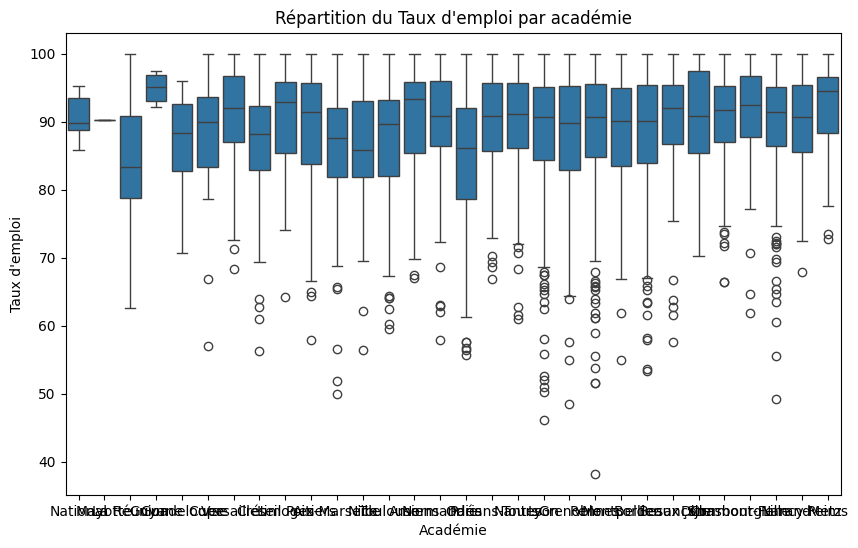

Moyenne et écart-type par académie 
                       mean        std
Académie                              
Aix-Marseille     86.228611   9.046213
Amiens            90.695068   7.736741
Besançon          88.446792  10.230364
Bordeaux          88.276864   9.178055
Clermont-Ferrand  91.396019   7.359173
Corse             86.728889  10.874573
Créteil           86.389125   9.290186
Dijon             90.465417   7.783076
Grenoble          87.758475  10.021546
Guadeloupe        87.425625   6.995602
Guyane            94.937500   2.546584
La Réunion        84.593529   9.101989
Lille             89.572029   8.183151
Limoges           90.617170   7.486006
Lyon              88.293237   9.831142
Mayotte           90.231177   0.000000
Montpellier       88.152663   9.083234
Nancy-Metz        90.027671   7.064582
Nantes            89.692767   8.536496
National          90.625000   3.637762
Nice              86.138452   8.606930
Normandie         90.071806   8.351070
Orléans-Tours     89.855086 

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouper par académie et calculer les statistiques descriptives
stats = df.groupby('Académie')["Taux d'emploi"].describe()
print("Statistiques descriptives du taux d'emploi par académie:")
print(stats)

# Créer un box plot pour visualiser la répartition du Taux d'insertion par académie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Académie', y="Taux d'emploi", data=df)
plt.title("Répartition du Taux d'emploi par académie")
plt.xlabel('Académie')
plt.ylabel("Taux d'emploi")
plt.show()

# Calculer la moyenne et l'écart-type par académie
mean_std = df.groupby('Académie')["Taux d'emploi"].agg(['mean', 'std'])
print(f"Moyenne et écart-type par académie ")
print(mean_std)


In [85]:
import pandas as pd

# Calculer le nombre de valeurs uniques dans la colonne 'Région'
nombre_valeurs_uniques_region = df["Taux d'insertion"].nunique()

# Afficher le résultat
print(f"Nombre de valeurs uniques dans la colonne 'Région' : {nombre_valeurs_uniques_region}")


Nombre de valeurs uniques dans la colonne 'Région' : 1459


Moyenne et écart-type par région:
                                 mean        std
Région                                          
Auvergne-Rhône-Alpes        92.650687   7.755893
Bourgogne-Franche-Comté     92.793663   7.538610
Bretagne                    92.072904   8.568508
Centre-Val de Loire         92.874138   6.738381
Corse                       90.304444  10.436650
Grand Est                   93.857082   5.639342
Guadeloupe                  89.331250   6.808496
Guyane                      94.937500   2.546584
Hauts-de-France             92.952808   6.590952
La Réunion                  88.238824   6.597042
Mayotte                     93.650487   0.000000
National                    94.183333   2.862165
Normandie                   93.025347   6.691557
Nouvelle-Aquitaine          92.355531   7.211471
Occitanie                   92.027056   6.970113
Pays de la Loire            92.681384   7.400898
Provence-Alpes-Côte d'Azur  90.366228   7.839121
Île-de-France               92.0923

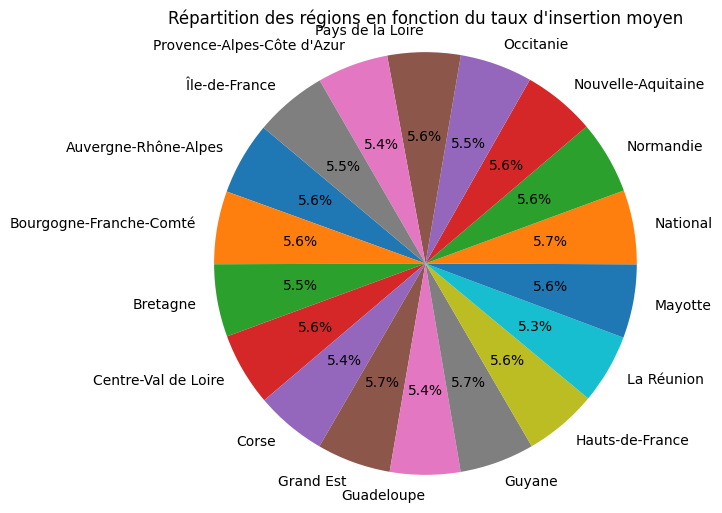

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer les lignes où "Taux d'insertion" n'est pas NaN
df_filtered = df.dropna(subset=["Taux d'insertion"])

# Calculer la moyenne et l'écart-type par région
mean_std = df_filtered.groupby('Région')["Taux d'insertion"].agg(['mean', 'std'])

# Identifier les régions avec des données insuffisantes (moyenne = NaN)
regions_with_nan = df['Région'][df['Région'].isin(mean_std[mean_std['mean'].isna()].index.unique())].unique()

# Supprimer les régions avec moyenne = NaN pour éviter de les inclure dans le graphique
mean_std = mean_std.dropna(subset=['mean'])

# Vérifier si le DataFrame mean_std n'est pas vide
if not mean_std.empty:
    # Afficher les statistiques
    print("Moyenne et écart-type par région:")
    print(mean_std)

    # Créer un pie chart basé sur les moyennes des régions
    plt.figure(figsize=(6, 6))
    plt.pie(mean_std['mean'], labels=mean_std.index, autopct='%1.1f%%', startangle=140)
    plt.title('Répartition des régions en fonction du taux d\'insertion moyen')

    # Ajouter la mention des régions non incluses sous le titre
    if len(regions_with_nan) > 0:
        plt.subplots_adjust(bottom=0.2)  # Créer de l'espace en bas pour le texte
        plt.figtext(0.5, 0.02, f"Les régions suivantes ne sont pas mentionnées car leurs données ne permettent pas de les positionner : {', '.join(regions_with_nan)}", ha="center", fontsize=10, wrap=True)

    plt.axis('equal')  # Assure que le pie chart est dessiné comme un cercle.

    # Afficher le graphique
    plt.show()
else:
    print("Le DataFrame mean_std est vide, veuillez vérifier les données d'entrée.")


Moyenne et écart-type par académie:
                       mean        std
Académie                              
Aix-Marseille     90.701250   7.856541
Amiens            92.738356   6.694049
Besançon          92.508491   8.586965
Bordeaux          91.680254   7.505546
Clermont-Ferrand  94.643148   5.911810
Corse             90.304444  10.436650
Créteil           90.815750   7.937268
Dijon             93.108542   6.256443
Grenoble          91.458983   8.517495
Guadeloupe        89.331250   6.808496
Guyane            94.937500   2.546584
La Réunion        88.238824   6.597042
Lille             93.009529   6.574540
Limoges           93.801132   6.339850
Lyon              92.637051   7.746701
Mayotte           93.650487   0.000000
Montpellier       92.110272   7.096901
Nancy-Metz        93.825479   5.218223
Nantes            92.681384   7.400898
National          94.183333   2.862165
Nice              89.791905   7.822569
Normandie         93.025347   6.691557
Orléans-Tours     92.874138 

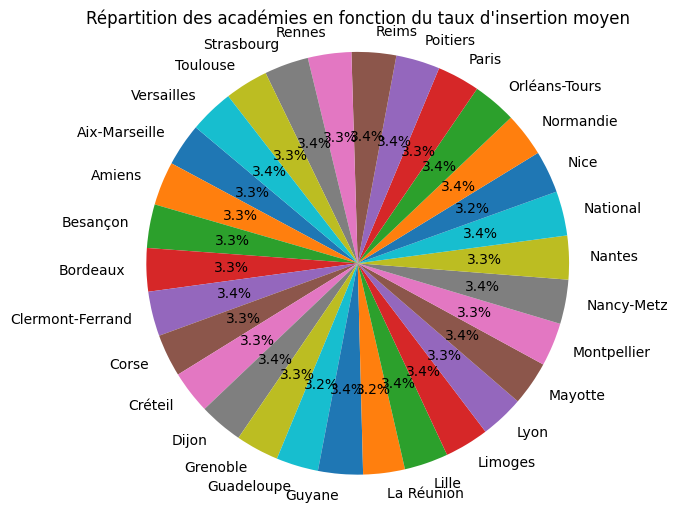

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer les lignes où "Taux d'insertion" n'est pas NaN
df_filtered = df.dropna(subset=["Taux d'insertion"])

# Calculer la moyenne et l'écart-type par académie
mean_std = df_filtered.groupby('Académie')["Taux d'insertion"].agg(['mean', 'std'])

# Identifier les académies avec des données insuffisantes (moyenne = NaN)
academies_with_nan = df['Académie'][df['Académie'].isin(mean_std[mean_std['mean'].isna()].index.unique())].unique()

# Supprimer les académies avec moyenne = NaN pour éviter de les inclure dans le graphique
mean_std = mean_std.dropna(subset=['mean'])

# Vérifier si le DataFrame mean_std n'est pas vide
if not mean_std.empty:
    # Afficher les statistiques
    print("Moyenne et écart-type par académie:")
    print(mean_std)

    # Créer un pie chart basé sur les moyennes des académies
    plt.figure(figsize=(6, 6))
    plt.pie(mean_std['mean'], labels=mean_std.index, autopct='%1.1f%%', startangle=140)
    plt.title('Répartition des académies en fonction du taux d\'insertion moyen')

    # Ajouter la mention des académies non incluses sous le titre
    if len(academies_with_nan) > 0:
        plt.subplots_adjust(bottom=0.2)  # Créer de l'espace en bas pour le texte
        plt.figtext(0.5, 0.02, f"Les académies suivantes ne sont pas mentionnées car leurs données ne permettent pas de les positionner : {', '.join(academies_with_nan)}", ha="center", fontsize=10, wrap=True)

    plt.axis('equal')  # Assure que le pie chart est dessiné comme un cercle.

    # Afficher le graphique
    plt.show()
else:
    print("Le DataFrame mean_std est vide, veuillez vérifier les données d'entrée.")


Top 10 académies par moyenne du taux d'insertion:
                       mean       std
Académie                             
Guyane            94.937500  2.546584
Clermont-Ferrand  94.643148  5.911810
Reims             94.511774  6.188020
National          94.183333  2.862165
Versailles        94.150745  5.422291
Nancy-Metz        93.825479  5.218223
Limoges           93.801132  6.339850
Strasbourg        93.608966  5.818198
Dijon             93.108542  6.256443
Poitiers          93.068879  6.855251


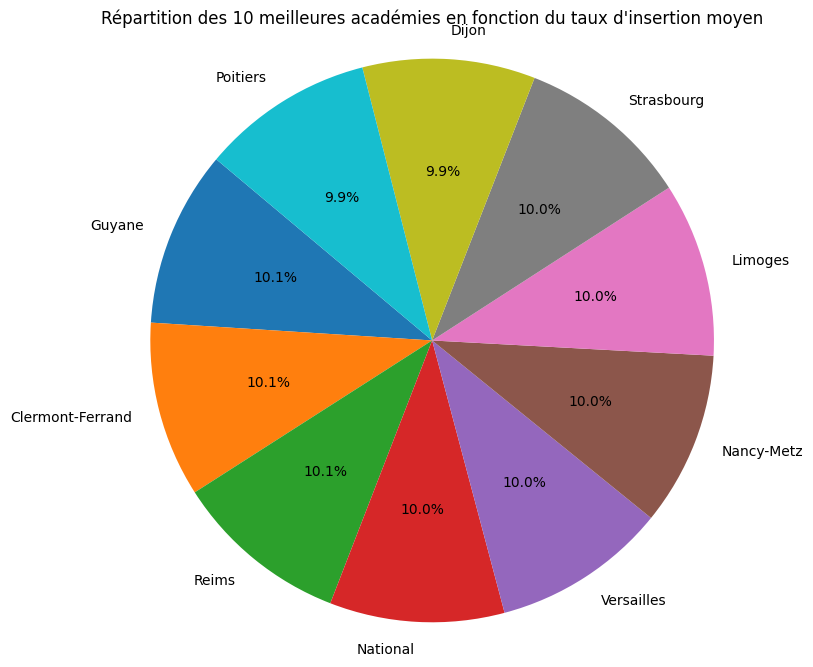

le taux d'insertion moyen se définit comme 92


In [88]:
#affiner par un effet loupe en n'affichant que les 10 meilleures académies :

# Filtrer pour exclure l'académie de "Mayotte"
df_filtered = df[df['Académie'] != 'Mayotte']

# Calculer la moyenne et l'écart-type par académie pour les académies restantes
mean_std = df_filtered.groupby('Académie')['Taux d\'insertion'].agg(['mean', 'std'])

# Trier par la moyenne dans l'ordre décroissant et sélectionner les 10 premières académies
top_10_academies = mean_std.sort_values(by='mean', ascending=False).head(10)

# Vérifier si le DataFrame top_10_academies n'est pas vide
if not top_10_academies.empty:
    # Afficher les statistiques
    print("Top 10 académies par moyenne du taux d'insertion:")
    print(top_10_academies)

    # Créer un pie chart basé sur les moyennes des académies
    plt.figure(figsize=(8, 8))
    plt.pie(top_10_academies['mean'], labels=top_10_academies.index, autopct='%1.1f%%', startangle=140)
    plt.title('Répartition des 10 meilleures académies en fonction du taux d\'insertion moyen')
    plt.axis('equal')  # Assure que le pie chart est dessiné comme un cercle.

    # Afficher le graphique
    plt.show()
else:
    print("Le DataFrame top_10_academies est vide, veuillez vérifier les données d'entrée.")
print(f"le taux d'insertion moyen se définit comme {round(df["Taux d'insertion"].mean())}")

Statistiques descriptives par académie:
                  count       mean        std        min        25%  \
Académie                                                              
Aix-Marseille     144.0  90.701250   7.856541  58.820000  87.167500   
Amiens             73.0  92.738356   6.694049  69.840000  88.660000   
Besançon           53.0  92.508491   8.586965  57.600000  90.690000   
Bordeaux          236.0  91.680254   7.505546  63.880000  88.127500   
Clermont-Ferrand  108.0  94.643148   5.911810  64.730000  91.967500   
Corse              18.0  90.304444  10.436650  56.980000  87.935000   
Créteil            80.0  90.815750   7.937268  66.560000  88.250000   
Dijon              48.0  93.108542   6.256443  75.740000  87.607500   
Grenoble          177.0  91.458983   8.517495  58.960000  87.360000   
Guadeloupe         16.0  89.331250   6.808496  71.330000  85.820000   
Guyane              4.0  94.937500   2.546584  92.200000  93.085000   
La Réunion         17.0  88.238824   

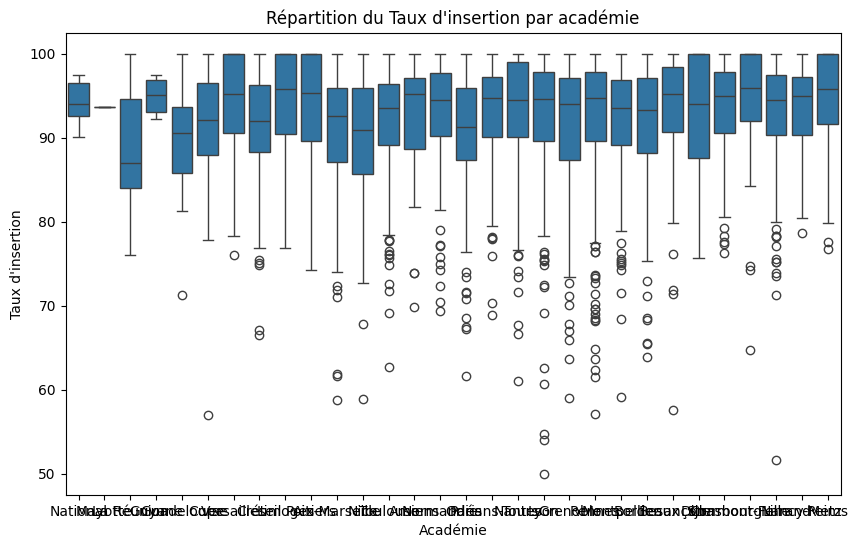

Moyenne et écart-type par académie:
                       mean        std
Académie                              
Aix-Marseille     90.701250   7.856541
Amiens            92.738356   6.694049
Besançon          92.508491   8.586965
Bordeaux          91.680254   7.505546
Clermont-Ferrand  94.643148   5.911810
Corse             90.304444  10.436650
Créteil           90.815750   7.937268
Dijon             93.108542   6.256443
Grenoble          91.458983   8.517495
Guadeloupe        89.331250   6.808496
Guyane            94.937500   2.546584
La Réunion        88.238824   6.597042
Lille             93.009529   6.574540
Limoges           93.801132   6.339850
Lyon              92.637051   7.746701
Mayotte           93.650487   0.000000
Montpellier       92.110272   7.096901
Nancy-Metz        93.825479   5.218223
Nantes            92.681384   7.400898
National          94.183333   2.862165
Nice              89.791905   7.822569
Normandie         93.025347   6.691557
Orléans-Tours     92.874138 

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt


# Grouper par académie et calculer les statistiques descriptives
stats = df.groupby('Académie')["Taux d'insertion"].describe()
print("Statistiques descriptives par académie:")
print(stats)

# Créer un box plot pour visualiser la répartition du Taux d'insertion par académie
plt.figure(figsize=(10, 6))
sns.boxplot(x='Académie', y="Taux d'insertion", data=df)
plt.title("Répartition du Taux d'insertion par académie")
plt.xlabel('Académie')
plt.ylabel('Taux d\'insertion')
plt.show()

# Calculer la moyenne et l'écart-type par académie
mean_std = df.groupby('Académie')["Taux d'insertion"].agg(['mean', 'std'])
print("Moyenne et écart-type par académie:")
print(mean_std)


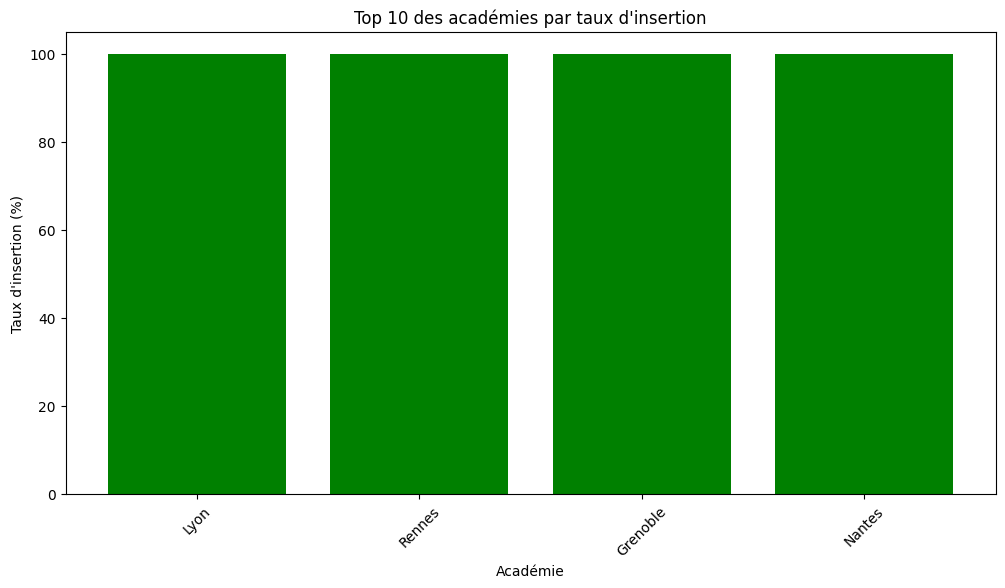

In [90]:

# Trier le dataframe par 'Taux d\'insertion' en ordre décroissant
df_sorted = df.sort_values(by='Taux d\'insertion', ascending=False)

# Sélectionner les 10 premières académies
top_10 = df_sorted.head(10)

# Afficher le dataframe trié
#print(top_10)

# Créer un histogramme des 10 meilleures académies
plt.figure(figsize=(12, 6))
plt.bar(top_10['Académie'], top_10['Taux d\'insertion'], color='green')
plt.xlabel('Académie')
plt.ylabel("Taux d'insertion (%)")
plt.title("Top 10 des académies par taux d'insertion")
plt.xticks(rotation=45)
plt.show()


                           Région  Académie              Établissement  \
38150        Auvergne-Rhône-Alpes      Lyon     Université Jean Monnet   
10935                    Bretagne    Rennes        Université Rennes 2   
38234        Auvergne-Rhône-Alpes  Grenoble  Université Grenoble Alpes   
12759            Pays de la Loire    Nantes         Le Mans Université   
12714            Pays de la Loire    Nantes         Le Mans Université   
...                           ...       ...                        ...   
45852  Provence-Alpes-Côte d'Azur      Nice     Université Côte d'Azur   
45853  Provence-Alpes-Côte d'Azur      Nice     Université Côte d'Azur   
45855  Provence-Alpes-Côte d'Azur      Nice     Université Côte d'Azur   
45856  Provence-Alpes-Côte d'Azur      Nice     Université Côte d'Azur   
45861  Provence-Alpes-Côte d'Azur      Nice     Université Côte d'Azur   

               Type de diplôme          Domaine disciplinaire  \
38150  Licence professionnelle  Sciences, tech

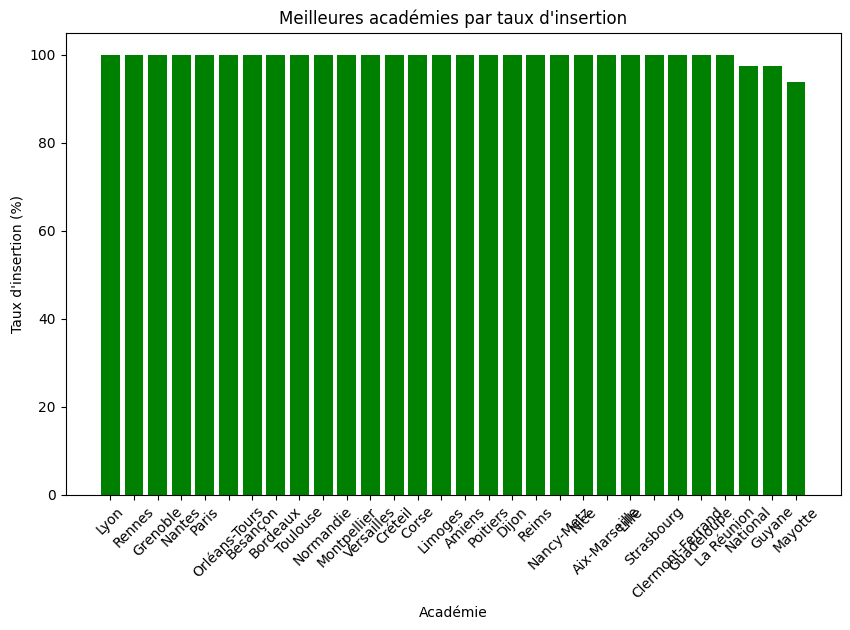

In [91]:
# Exemple de création de dataframe
# Trier le dataframe par 'Taux d'insertion' en ordre décroissant
df_sorted = df.sort_values(by="Taux d'insertion", ascending=False)

# Afficher le dataframe trié
print(df_sorted)

# Créer un histogramme des meilleures académies
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Académie'], df_sorted["Taux d'insertion"], color='green')
plt.xlabel('Académie')
plt.ylabel("Taux d'insertion (%)")
plt.title("Meilleures académies par taux d'insertion")
plt.xticks(rotation=45)
plt.show()


C:\Users\Sybille\AppData\Local\Temp\ipykernel_16036\2461242402.py:36: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


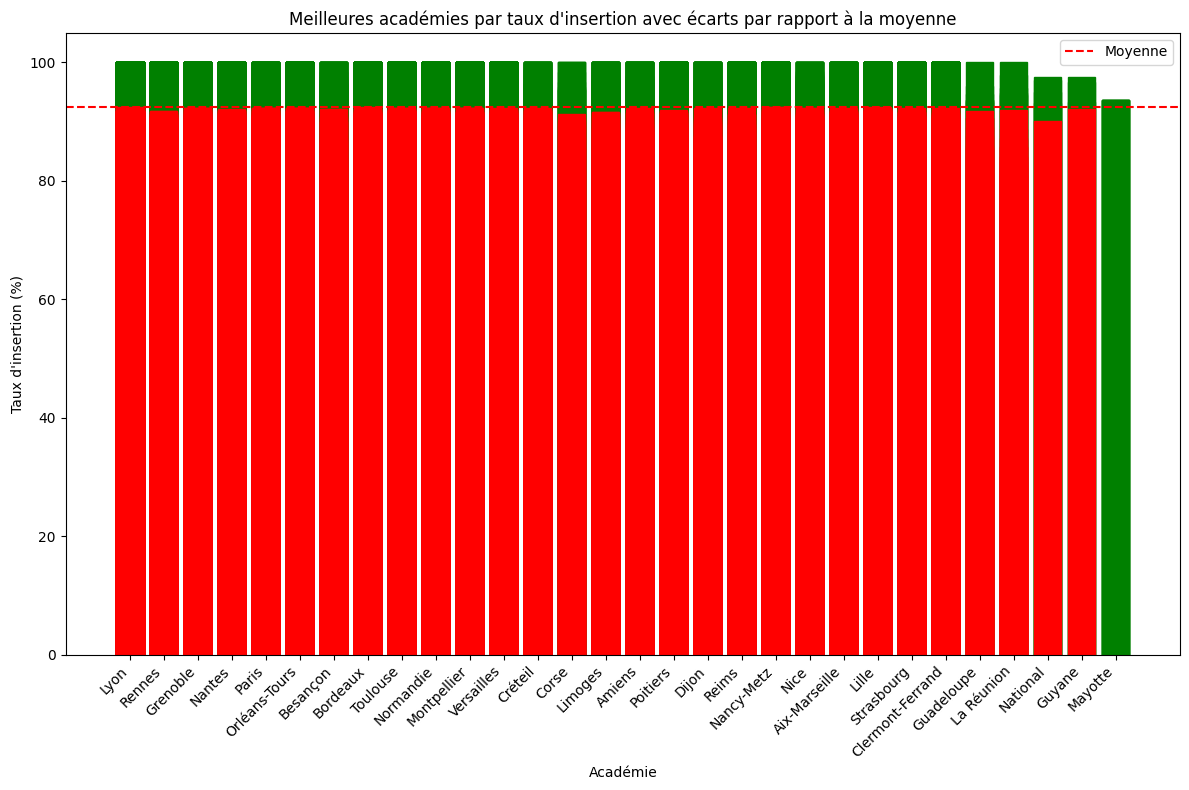

In [92]:
#meilleure visualisation 1 
import numpy as np
import matplotlib.pyplot as plt

# Trier le dataframe par 'Taux d'insertion' en ordre décroissant
df_sorted = df.sort_values(by="Taux d'insertion", ascending=False)

# Calculer la moyenne des taux d'insertion
mean_insertion_rate = df_sorted["Taux d'insertion"].mean()

# Calculer les écarts par rapport à la moyenne
df_sorted['Ecart à la moyenne'] = df_sorted["Taux d'insertion"] - mean_insertion_rate

# Créer un histogramme des meilleures académies avec une ligne pour la moyenne
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['Académie'], df_sorted["Taux d'insertion"], color='skyblue')

# Ajouter une ligne horizontale représentant la moyenne
plt.axhline(y=mean_insertion_rate, color='r', linestyle='--', label='Moyenne')

# Mettre en évidence les académies avec un taux d'insertion significativement supérieur à la moyenne
for bar, ecart in zip(bars, df_sorted['Ecart à la moyenne']):
    if ecart > 0:
        bar.set_color('green')
    elif ecart < 0:
        bar.set_color('red')

# Ajuster les labels et le titre
plt.xlabel('Académie')
plt.ylabel("Taux d'insertion (%)")
plt.title("Meilleures académies par taux d'insertion avec écarts par rapport à la moyenne")
plt.xticks(rotation=45, ha='right')
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()


                           Région  Académie              Établissement  \
38150        Auvergne-Rhône-Alpes      Lyon     Université Jean Monnet   
10935                    Bretagne    Rennes        Université Rennes 2   
38234        Auvergne-Rhône-Alpes  Grenoble  Université Grenoble Alpes   
12759            Pays de la Loire    Nantes         Le Mans Université   
12714            Pays de la Loire    Nantes         Le Mans Université   
...                           ...       ...                        ...   
45852  Provence-Alpes-Côte d'Azur      Nice     Université Côte d'Azur   
45853  Provence-Alpes-Côte d'Azur      Nice     Université Côte d'Azur   
45855  Provence-Alpes-Côte d'Azur      Nice     Université Côte d'Azur   
45856  Provence-Alpes-Côte d'Azur      Nice     Université Côte d'Azur   
45861  Provence-Alpes-Côte d'Azur      Nice     Université Côte d'Azur   

               Type de diplôme          Domaine disciplinaire  \
38150  Licence professionnelle  Sciences, tech

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

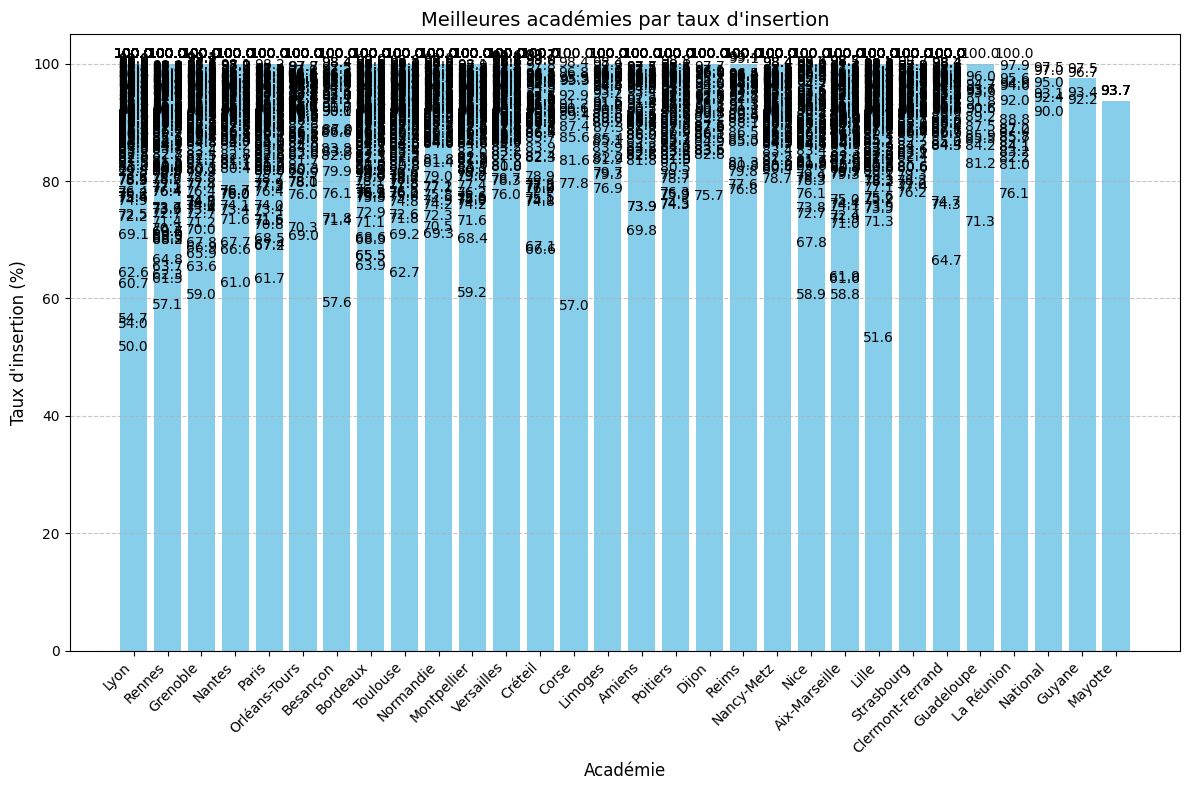

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Trier le dataframe par 'Taux d'insertion' en ordre décroissant
df_sorted = df.sort_values(by="Taux d'insertion", ascending=False)

# Afficher le dataframe trié
print(df_sorted)

# Créer un histogramme des meilleures académies avec annotations
plt.figure(figsize=(12, 8))
bars = plt.bar(df_sorted['Académie'], df_sorted["Taux d'insertion"], color='skyblue')

# Ajouter des annotations pour montrer les écarts
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 1), ha='center', va='bottom')

plt.xlabel('Académie', fontsize=12)
plt.ylabel("Taux d'insertion (%)", fontsize=12) 
plt.title("Meilleures académies par taux d'insertion", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df_sorted["Taux d'insertion"].max() + 5)  # Ajuster les limites de l'axe y pour mieux voir les écarts
plt.grid(axis='y', linestyle='--', alpha=0.7)   

# Afficher le graphique
plt.tight_layout()
plt.show()


In [94]:
# Filtrer les lignes où "Source de données" est "IP"
#df_ip = df.loc[df['Source de données'] == 'IP']
# Calcul du nombre de valeurs distinctes pour chaque colonne
#distinct_counts = df_ip.nunique()

#print(distinct_counts)
#df_ip.head()
#df_ip.info()

In [95]:
#contrôle du nettoyage

# Sauvegarder le DataFrame dans un fichier CSV
df.to_csv('esr_intersup_nettoye.csv', index=False)
print("Le dataset nettoyé a été sauvegardé dans le fichier 'esr_intersup_nettoye.csv'.")


Le dataset nettoyé a été sauvegardé dans le fichier 'esr_intersup_nettoye.csv'.


In [96]:
	#Taux d'emploi salarié en France	Taux d'insertion	Taux d'emploi

In [97]:
## LIEN API SUR L'AUTRE JEU DE DONNEES /  https://data.enseignementsup-recherche.gouv.fr/api/explore/v2.1/catalog/datasets/fr-esr-insertion_professionnelle-master/records?limit=20 

<Figure size 1500x1500 with 0 Axes>

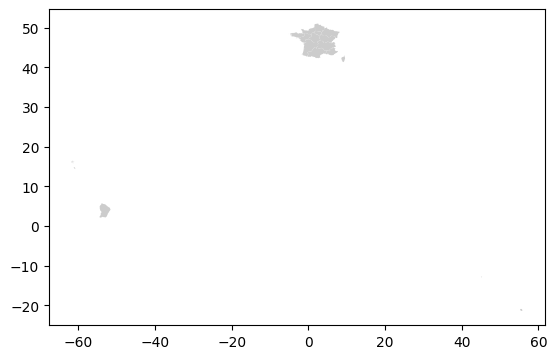

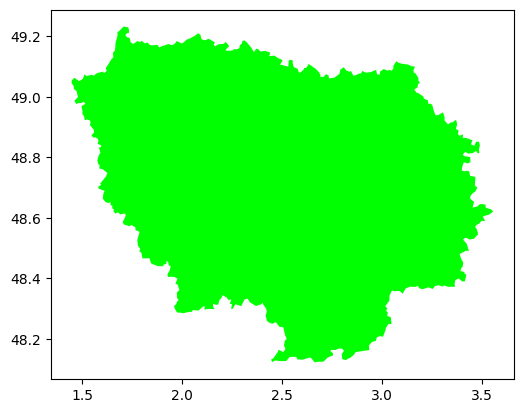

In [98]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger le fichier GeoJSON
regions = gpd.read_file('https://france-geojson.gregoiredavid.fr/repo/regions.geojson')

# Définir la taille de la figure
plt.figure(figsize=(15, 15))

# Définir une couleur par défaut pour toutes les régions
base_color = '#cccccc'  # Gris clair

# Afficher toutes les régions avec la couleur par défaut
regions.plot(color=base_color)

# Définir la région spécifique à colorier
region_name = "Île-de-France"  # Remplacez par le nom de la région désirée
specific_color = '#00FF00'  # Vert

# Filtrer et afficher la région spécifique avec une autre couleur
regions[regions['nom'] == region_name].plot(color=specific_color)

plt.show()


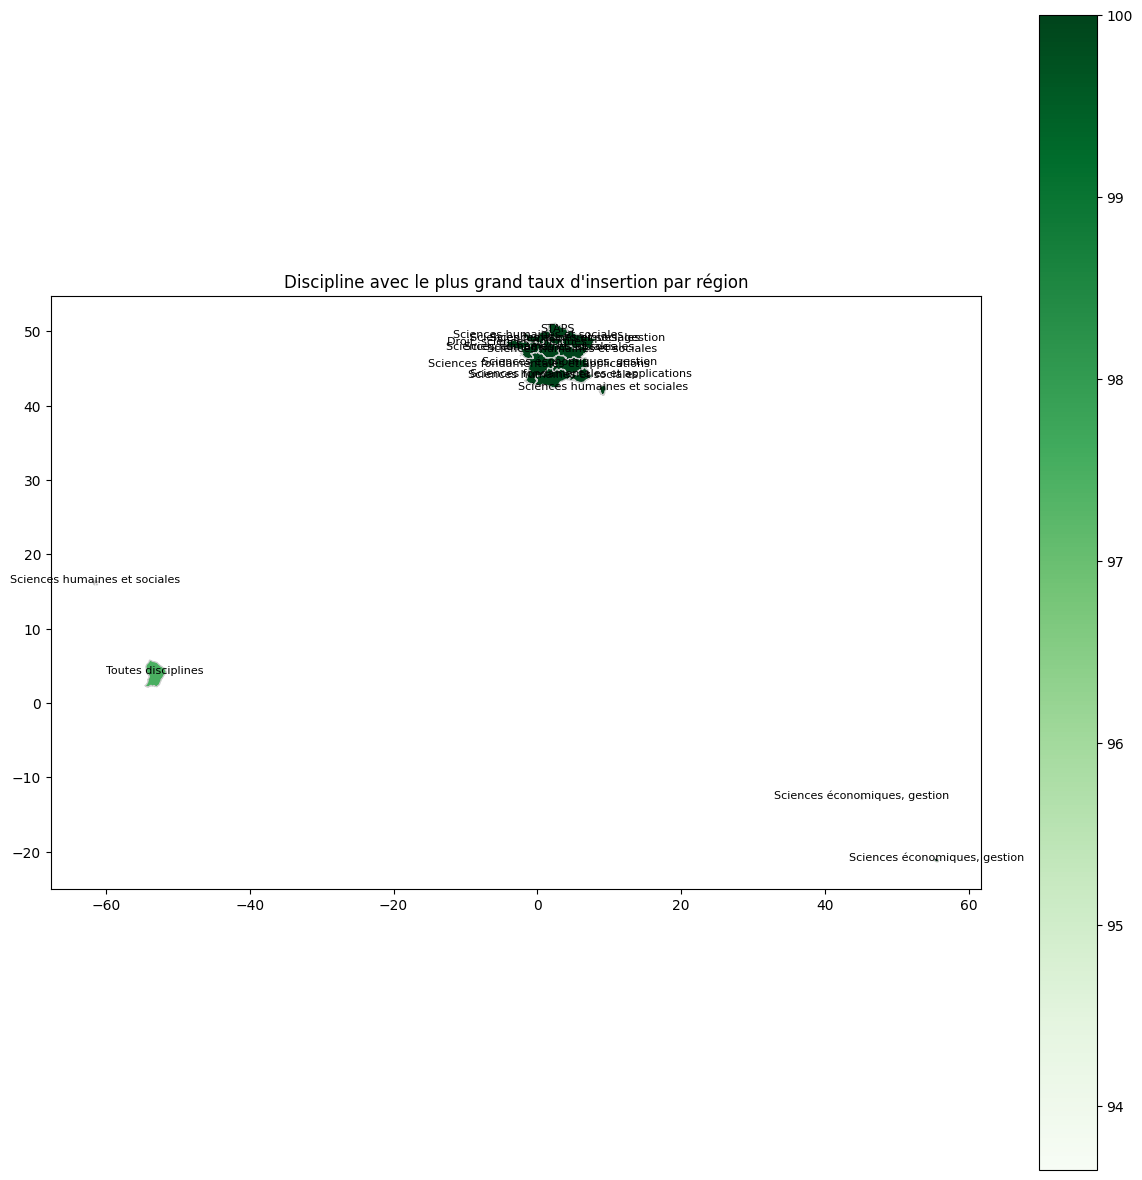

In [99]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Retirer les lignes avec des valeurs manquantes dans les colonnes 'Région' ou "Taux d'insertion"
df1 = df.dropna(subset=['Région', "Taux d'insertion"])

# Identifier la discipline avec le plus grand taux d'insertion pour chaque région
# Utiliser df1 au lieu de df pour le groupby et idxmax
top_disciplines = df1.loc[df1.groupby('Région')["Taux d'insertion"].idxmax()]

# Charger les données GeoJSON des régions françaises
url = 'https://france-geojson.gregoiredavid.fr/repo/regions.geojson'
regions_geo = gpd.read_file(url)

# Assurer que les noms de région dans les données géographiques et le dataframe correspondent
regions_geo['nom'] = regions_geo['nom'].str.strip()
top_disciplines['Région'] = top_disciplines['Région'].str.strip()

# Joindre les données des disciplines au GeoDataFrame
try:
    regions_geo = regions_geo.merge(top_disciplines, left_on='nom', right_on='Région')
except KeyError as e:
    print(f"KeyError: {e} - Ignoring missing entries.")

# Créer une carte
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
regions_geo.plot(column="Taux d'insertion", cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annoter chaque région avec la discipline ayant le plus grand taux d'insertion
for idx, row in regions_geo.iterrows():
    plt.annotate(text=row['Discipline'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=8, color='black')

plt.title('Discipline avec le plus grand taux d\'insertion par région')
plt.show()


In [100]:
### mon texte brut entre guillemets
st.text("Hi,\nPeople\t!!!!!!!!!")
st.text('Welcome to')
st.text(""" Streamlit's World""")

2024-08-21 18:15:18.380 
  command:

    streamlit run c:\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [101]:
st.title("Présentation synthétiques des débouchés Master LMD, MEEF et licences professionnelles sur la période \n 2019 - 2021", anchor="Apress")
st.header("""septembre 2024 - Sybille Dethoor-Loth""") ### l'entête pout repréenter un sensemble de contenus
st.text("ceci est un texte simple") 
st.subheader("""présentation générale synthèse du territoire""") ### le sous entête pout repréenter un sensemble de contenus
st.caption("""Ceci est ma légende""") ### légende : explication qui décrit des notes, des notes de bas de page, des tableaux, des images et des vidéos.


DeltaGenerator()

In [102]:
st.subheader('Lire et afficher des données CSV')
file = st.file_uploader("Téléchargez un fichier CSV", type="csv")
if file is not None:
    df_csv = pd.read_csv(file)
    st.dataframe(df_csv)

In [103]:
# Afficher une variable
nombre = 123
st.write("Afficher une variable numérique:", nombre)

# Afficher la date et l'heure actuelle
st.write("Date et heure actuelle:", datetime.datetime.now())

In [104]:
### mon texte formaté en latex pour la documentation technique

st.latex(r'''cos2\theta = 1 - 2sin^2\theta''')
st.latex("""(a+b)^2 = a^2 + b^2 + 2ab""")
st.latex(r'''\frac{\partial u}{\partial t}
   = h^2 \left( \frac{\partial^2 u}{\partial x^2}
      + \frac{\partial^2 u}{\partial y^2}
      + \frac{\partial^2 u}{\partial z^2} \right)''')

DeltaGenerator()

In [105]:
### mon texte formaté
st.markdown("# Hi,\n# ***People*** \t!!!!!!!!!")
st.markdown('## Welcome to')
st.markdown("""### Streamlit's World""")

DeltaGenerator()

In [106]:
### ici le code : La bibliothèque Streamlit offre une certaine flexibilité pour afficher le code de différents langages de programmation. 
### Le texte est mis en surbrillance comme indiqué dans un éditeur de code.
# Python Code
st.subheader("""Python Code""")
code = '''def hello():
     print("Hello, Streamlit!")'''
st.code(code, language='python')

# Java Code
st.subheader("""Java Code""")
st.code("""public class GFG {
    public static void main(String args[])
    {
        System.out.println("Hello World");
    }
}""", language='javascript')
st.subheader("""JavaScript Code""")
st.code(""" <p id="demo"><p>
<script>
try {
  adddlert("Welcome guest!");
}
catch(err) {
  document.getElementById("demo").innerHTML = err.message;
}
</script>
""")

DeltaGenerator()